<a href="https://colab.research.google.com/github/Georgia-MAX-holic/Footprints/blob/main/PJ/game_sale/New/Game_Sales.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

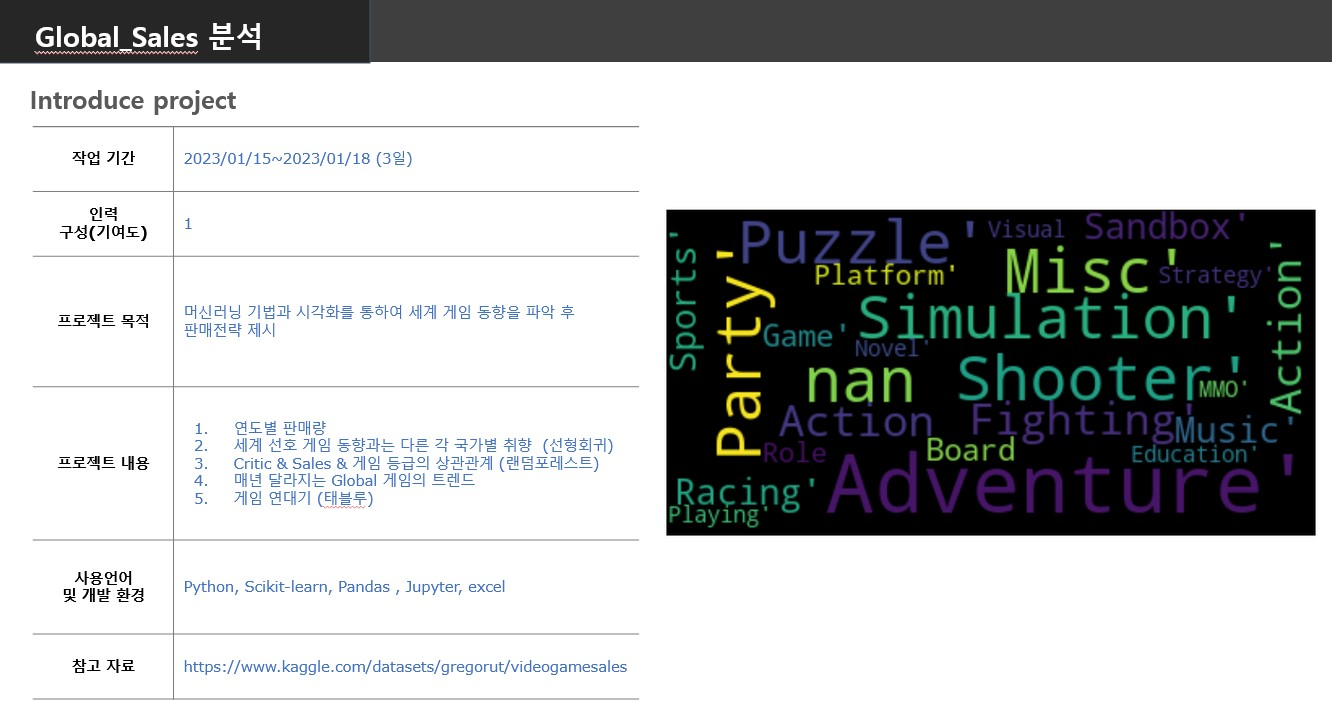

# 기본셋팅

- install category_encoders
- Google mount
- import pandas as pd
- SNS_BAR_PLOT
- circle_graph

In [1]:
!pip install category_encoders

import pandas as pd
from google.colab import drive

drive.mount('/content/drive')
filetitle = '/content/drive/My Drive/cpding/asdf/Game_data_EDA.csv'

df = pd.read_csv(filetitle)



   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 82.0/82.0 kB 1.8 MB/s eta 0:00:00
Mounted at /content/drive


In [2]:
def SNS_BAR_PLOT(X, Y ,TITLE, DATA):
  plt.figure(figsize=(30,10))
  graph = sns.barplot(x=X, y=Y, data=DATA).set_title(TITLE)
  return graph

def circle_graph(X,Y):
   labels = X
   values = Y

   plt.pie(values, labels=labels)
   plt.show()

# 가장 많이 팔린 게임들

- Will Sports , PUBG, 슈퍼마리오, 슈퍼마리오 리조트 순서

## 전처리 & Code

In [3]:
def sales_max() :
  df_chart = df[["Name","Global_Sales"]]
  df_chart.set_index("Name", inplace = True )
  sales_max = df_chart.idxmax(axis=0 , skipna=True )
  return sales_max

In [4]:
df.head()

,Unnamed: 0,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales,Null,Critic_Score,Critic_Count,User_Score,User_Count,Unnamed: 17,Rating
0,0.0,1.0,Wii Sports,Wii,2006.0,Sports,Nintendo,41.49,29.02,3.77,8.46,82.74,7.100168,76.0,51.0,8,322.0,NaN,E
1,NaN,NaN,PUBG,Series,2017.0,Shooter,PUBG Corporation,NaN,NaN,NaN,NaN,60.00,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,1.0,2.0,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24,4.986230,NaN,NaN,NaN,NaN,NaN,NaN
3,448.0,2.0,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24,4.986230,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,PLAYERUNKNOWN'S BATTLEGROUNDS,PC,2017.0,Shooter,PUBG Corporation,NaN,NaN,NaN,NaN,36.60,NaN,NaN,NaN,NaN,NaN,NaN,NaN


가장 많이 팔린 제품 = 닌텐도 윌 스포츠

In [5]:
df=  df.sort_values(by="Rank" , ascending = True)
df=df[["Rank","Name","Platform","Year","Genre","Publisher","NA_Sales","EU_Sales","JP_Sales","Other_Sales","Global_Sales","Critic_Score","Critic_Count","User_Score","User_Count","Rating"]]

In [6]:
df

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales,Critic_Score,Critic_Count,User_Score,User_Count,Rating
0,1.0,Wii Sports,Wii,2006.0,Sports,Nintendo,41.49,29.02,3.77,8.46,82.74,76.0,51.0,8,322.0,E
2,2.0,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24,NaN,NaN,NaN,NaN,NaN
3,2.0,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24,NaN,NaN,NaN,NaN,NaN
5,3.0,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.85,12.88,3.79,3.31,35.82,82.0,73.0,8.3,709.0,E
6,4.0,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.75,11.01,3.28,2.96,33.00,80.0,73.0,8,192.0,E
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
40714,NaN,Hyper Light Drifter,PSV,2017.0,Role-Playing,Rebellion Games,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
40715,NaN,Hyper Light Drifter,Linux,2017.0,Role-Playing,Rebellion Games,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
40716,NaN,Hyperdevotion Noire: Goddess Black Heart,PC,2017.0,Role-Playing,Idea Factory International,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
40717,NaN,Sniper: Ghost Warrior 3,Wii,2017.0,Shooter,City Interactive,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [7]:
df=df.drop_duplicates() # 모든 조건이 똑같은 중복된 값이 일부 존재하는듯 하다, 제거

In [8]:
df.head()

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales,Critic_Score,Critic_Count,User_Score,User_Count,Rating
0,1.0,Wii Sports,Wii,2006.0,Sports,Nintendo,41.49,29.02,3.77,8.46,82.74,76.0,51.0,8,322.0,E
2,2.0,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24,NaN,NaN,NaN,NaN,NaN
5,3.0,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.85,12.88,3.79,3.31,35.82,82.0,73.0,8.3,709.0,E
6,4.0,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.75,11.01,3.28,2.96,33.00,80.0,73.0,8,192.0,E
7,5.0,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37,NaN,NaN,NaN,NaN,NaN


## 그래프

In [9]:
sales_max()

,0
Global_Sales,Wii Sports


<Axes: xlabel='Name', ylabel='Global_Sales'>

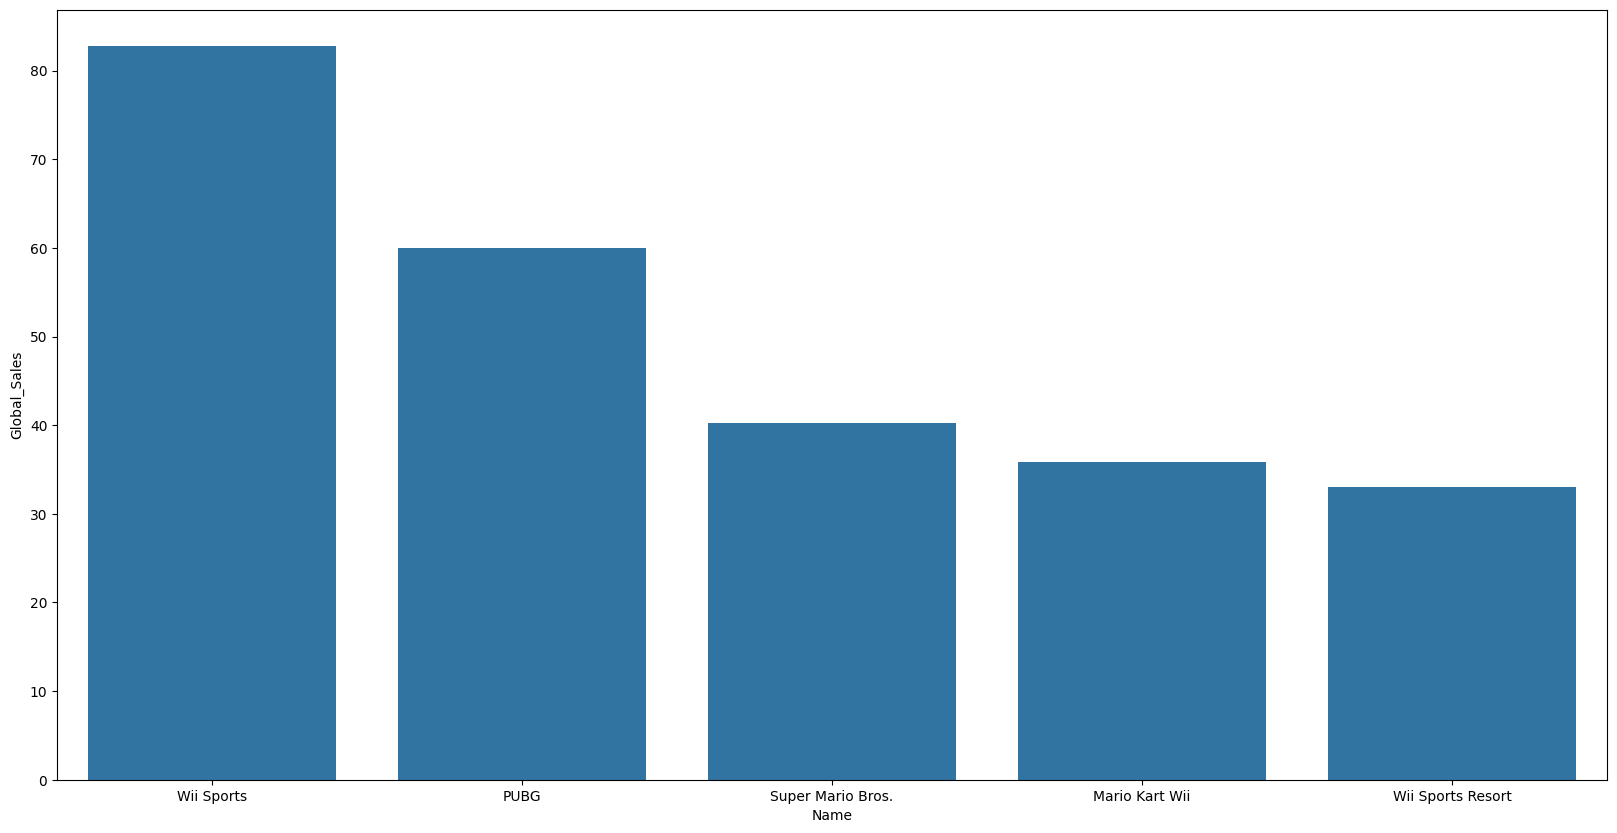

In [10]:
import matplotlib.pyplot as plt
import seaborn as sns

top5_visual=df.loc [[0,1,2,5,6]]
plt.figure(figsize=(20,10))
sns.barplot(x='Name', y='Global_Sales', data=top5_visual)

# 연도별 판매량 , 플랫폼별 판매량 , 장르별 판매량

## Code

In [11]:
df_Platform = df[["Platform","Global_Sales"]].dropna()
df_Genre =  df[["Genre", "Global_Sales"]]

In [12]:
df_Platform = df_Platform.groupby("Platform").sum()
df_Genre = df_Genre.groupby("Genre").sum()

In [13]:
df_Platform = df_Platform.sort_values(by="Global_Sales" , ascending=False).reset_index()
df_Genre = df_Genre.sort_values(by="Global_Sales", ascending=False).reset_index()

In [14]:
import matplotlib.pyplot as plt
import seaborn as sns
release_date_sale =  df[["Year","Global_Sales"]].groupby('Year')['Global_Sales'].sum().reset_index()

## 그래프


Text(0.5, 1.0, 'Global_Sales_Genre')

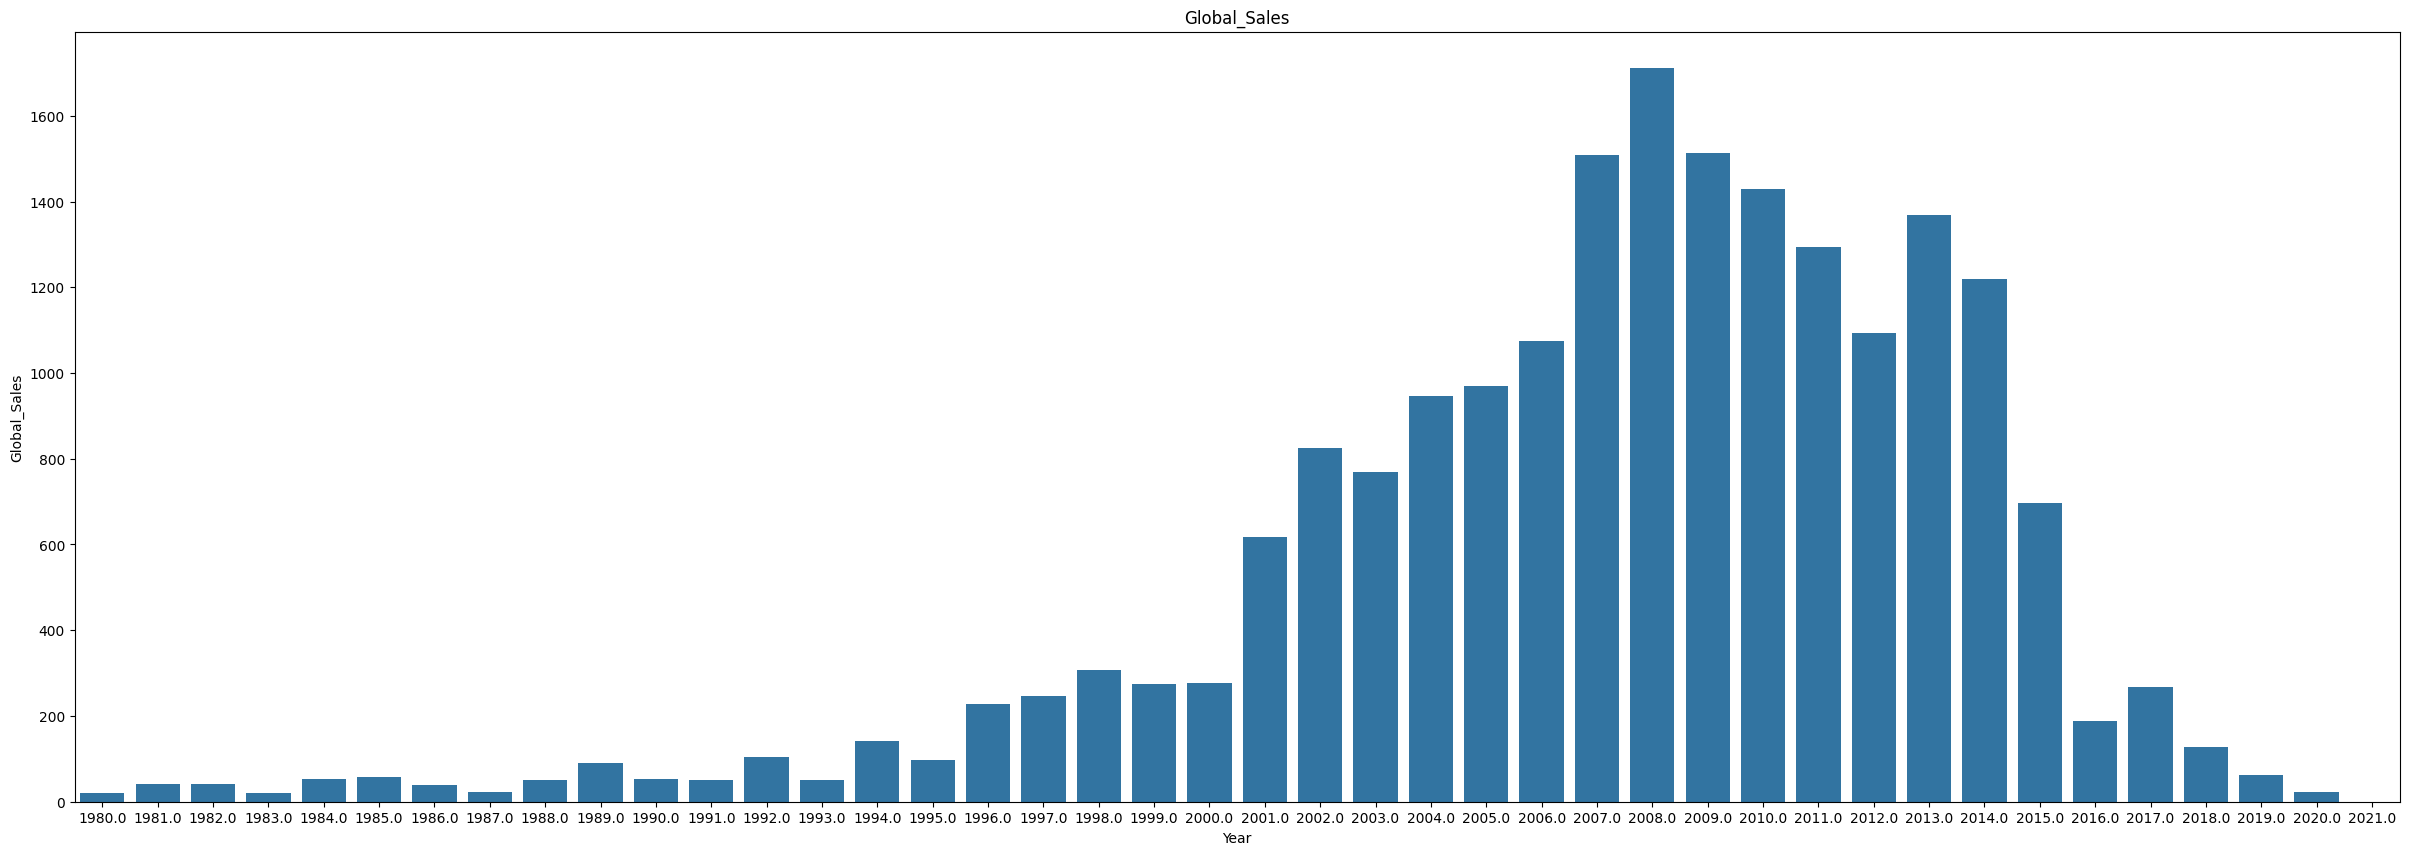

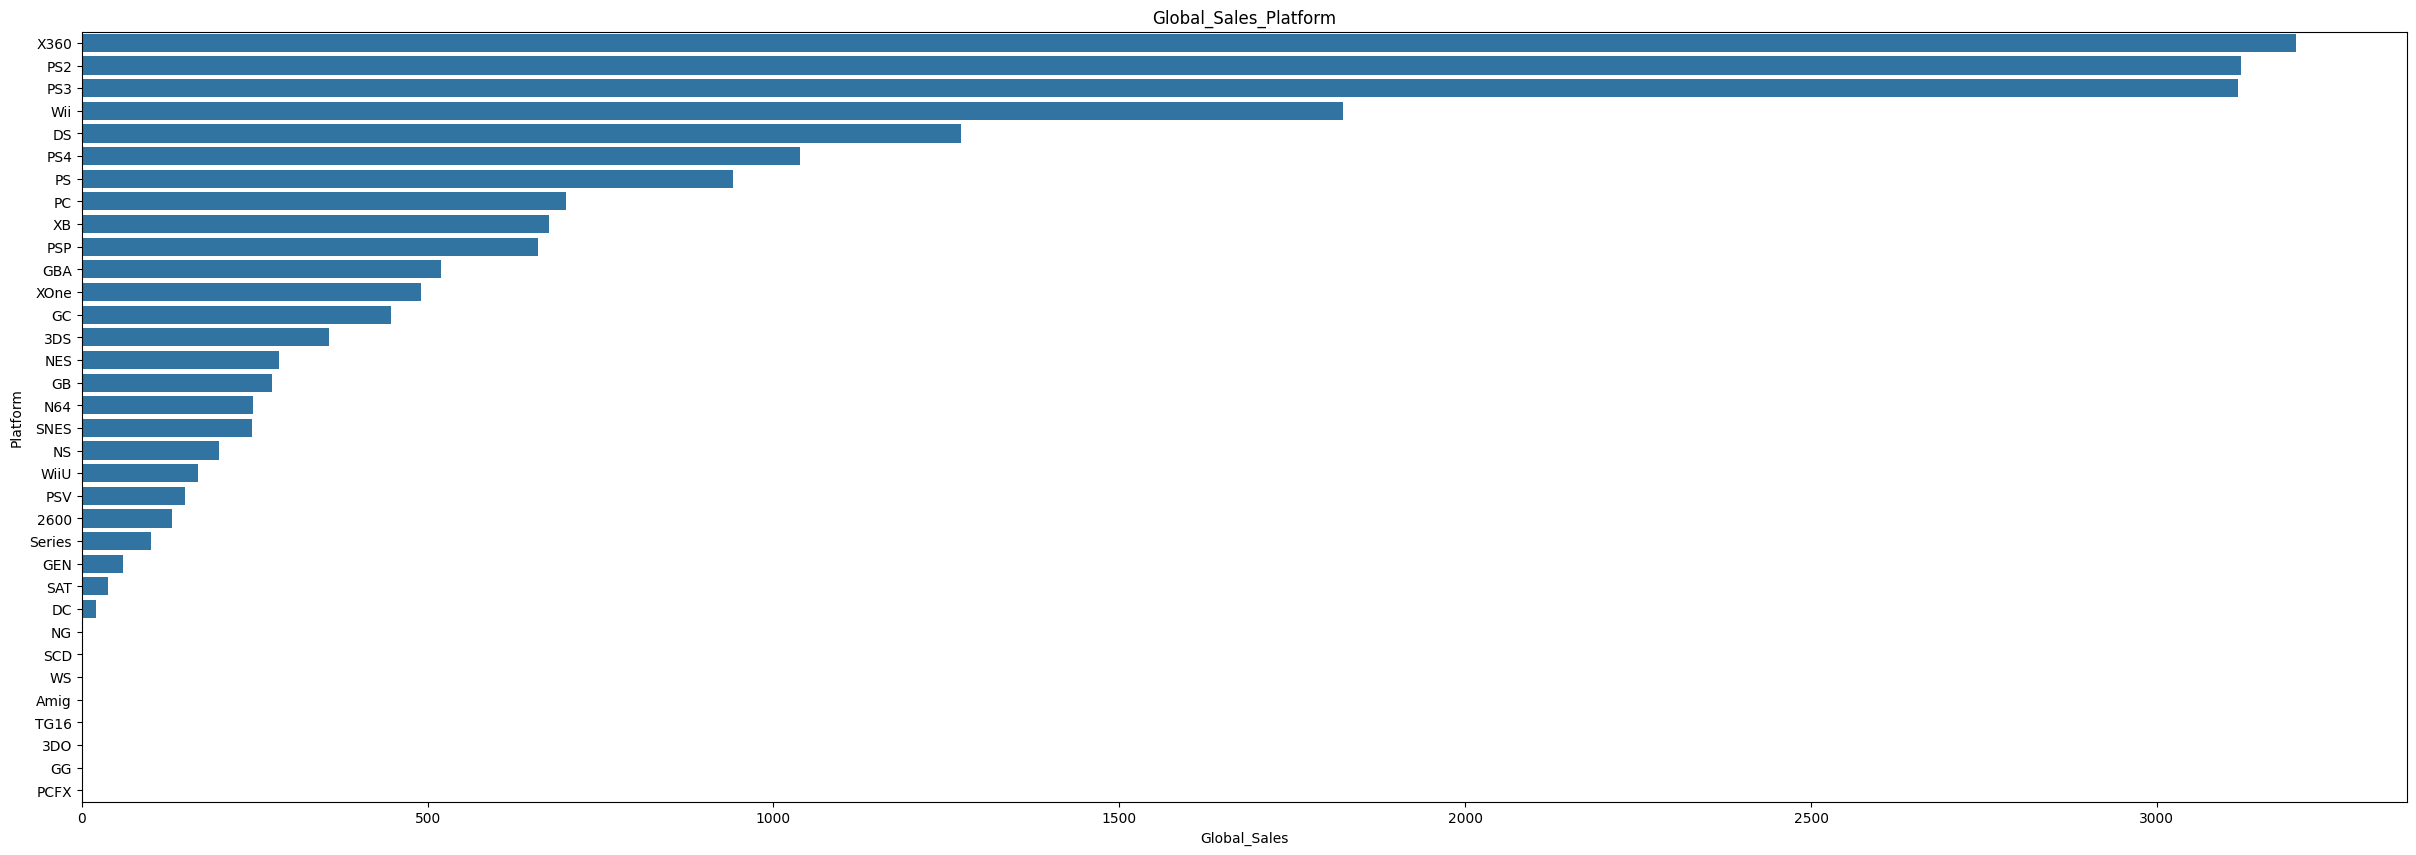

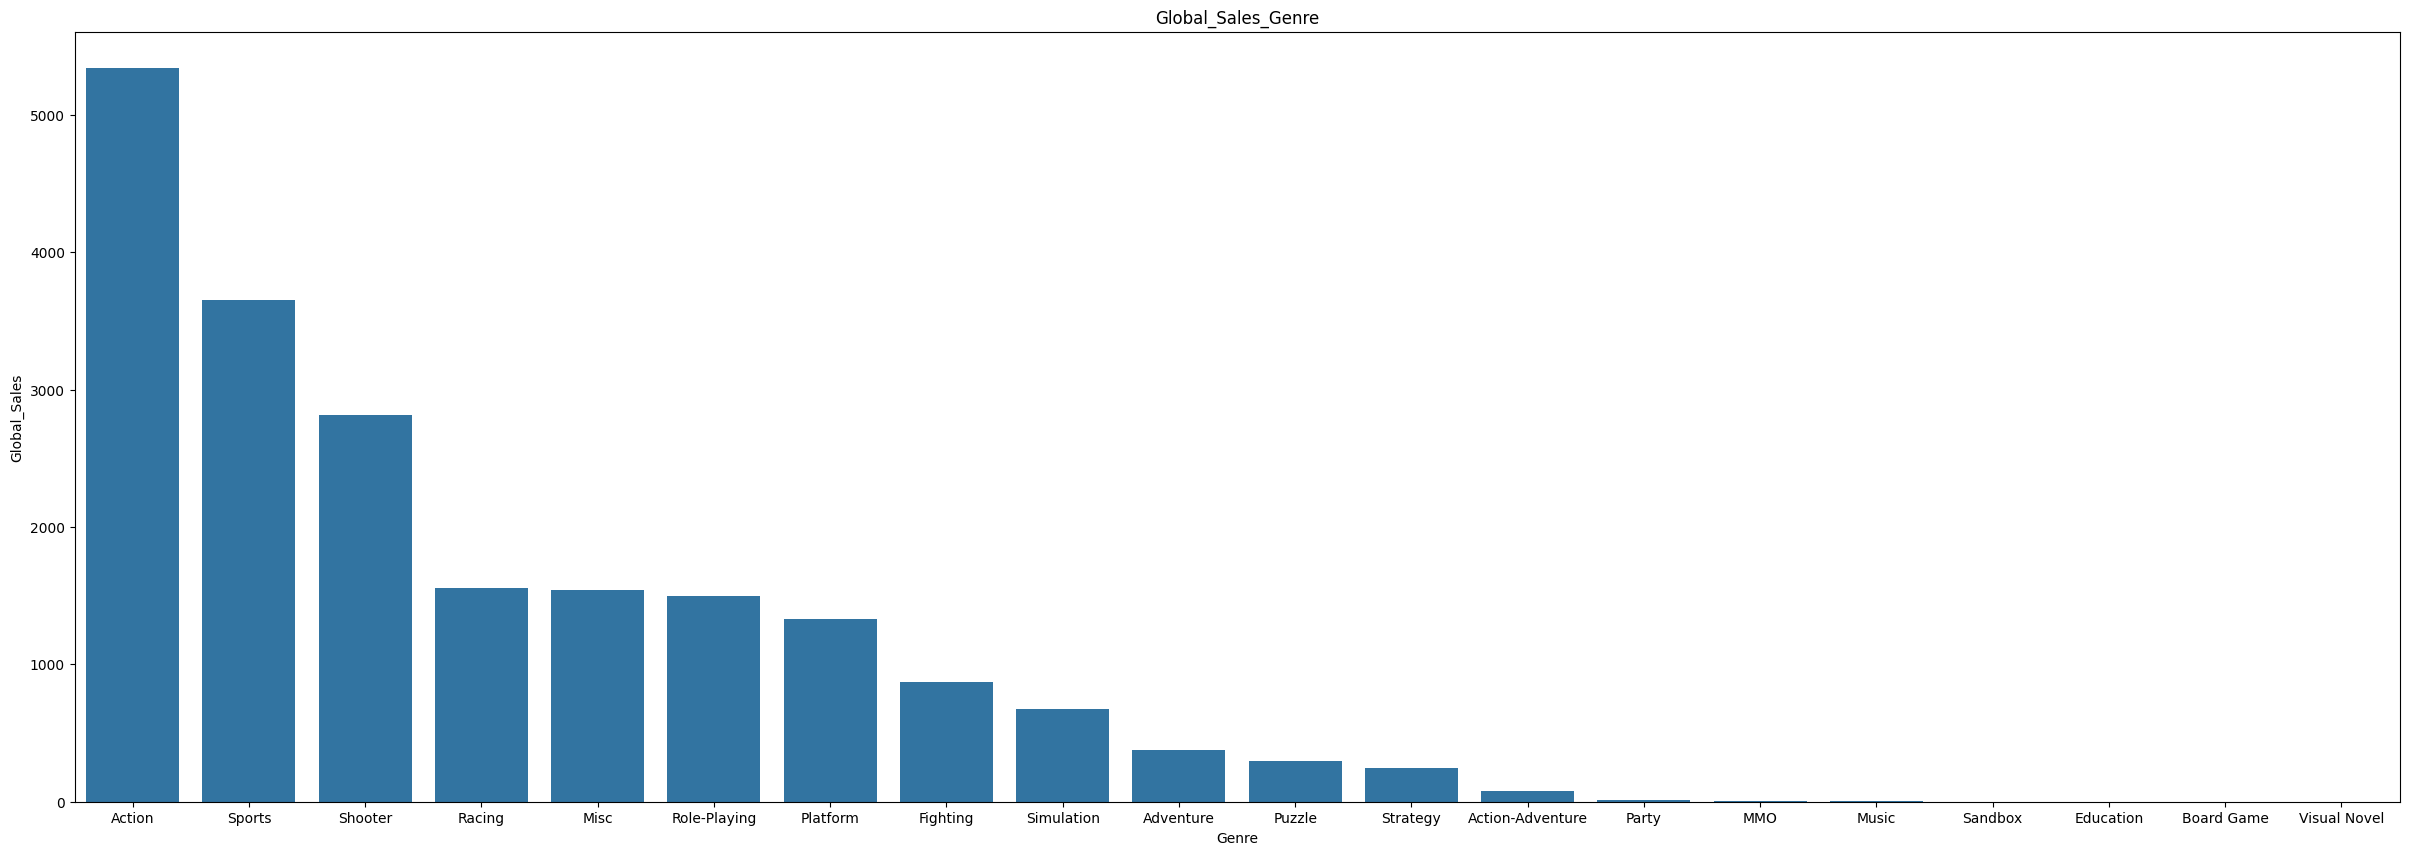

In [15]:
SNS_BAR_PLOT("Year","Global_Sales","Global_Sales",release_date_sale)

SNS_BAR_PLOT("Global_Sales","Platform" , "Global_Sales_Platform",df_Platform)

SNS_BAR_PLOT("Genre","Global_Sales","Global_Sales_Genre",df_Genre)


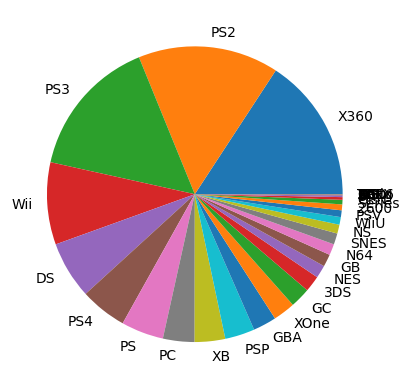

In [16]:
circle_graph(df_Platform["Platform"], df_Platform["Global_Sales"])

- 데이터 결과
   - 2008년쯤 가장 많은 게임이 판매됨
   - 역대 가장 많은 판매량을 기록한 기기는 X360이며 그 뒤로 PS2 ,PS3 가 따라옴  
   - 가장 많은 판매량을 기록한 장르는 액션 장르

# 국가별 판매량이 다른지

귀무가설 : 각 국가별 판매량은 같을것

대안가설 : 각 국가별 판매량은 다를것

EU와 NA의 p-value값이 5 귀무가설 기각하고 대안가설을 채택한다

---

귀무가설: 전 세계 판매량

In [17]:
p_vale_df = df[["NA_Sales","EU_Sales", "JP_Sales","Global_Sales"]].dropna()

In [18]:
from scipy import stats
stats.ttest_ind(p_vale_df["NA_Sales"],p_vale_df["EU_Sales"])

TtestResult(statistic=24.785011496920717, pvalue=5.674215545302935e-135, df=63846.0)

# 국가별 장르 선호도가 다를지

귀무가설 : 국가별 장르별 선호도가 같을것

대안가설 : 국가별 장르별 선호도가 다를것

p-value: 6.2 , 0.05보다 훨씬 크므로 귀무가설을 기각하고 대안가설을 채택한다.

In [19]:
p_value_Action = df[df["Genre"]=="Action"][["NA_Sales","EU_Sales"]].dropna()

In [20]:
stats.ttest_ind(p_value_Action["NA_Sales"],p_value_Action["EU_Sales"])

TtestResult(statistic=12.169164341806846, pvalue=6.285886615188554e-34, df=16944.0)

# 시간의 흐름에 따라 인기있는 장르가 다른지

## Code

In [21]:
def do_list_release_date_genre(i, title) :
 df_year=df[["Year","Genre" , title]]

 df_year=df[df["Year"] == i]
 df_release_date=df_year[["Year","Genre","Global_Sales"]].groupby(by=['Year','Genre']).sum().idxmax()
 return df_release_date


## 연도별 인기 장르 Text

In [22]:
for i in range(1980,2021):
   print(do_list_release_date_genre(i,"Global_Sales"))

Global_Sales    (1980.0, Shooter)
dtype: object
Global_Sales    (1981.0, Action)
dtype: object
Global_Sales    (1982.0, Puzzle)
dtype: object
Global_Sales    (1983.0, Platform)
dtype: object
Global_Sales    (1984.0, Shooter)
dtype: object
Global_Sales    (1985.0, Platform)
dtype: object
Global_Sales    (1986.0, Action)
dtype: object
Global_Sales    (1987.0, Fighting)
dtype: object
Global_Sales    (1988.0, Platform)
dtype: object
Global_Sales    (1989.0, Puzzle)
dtype: object
Global_Sales    (1990.0, Platform)
dtype: object
Global_Sales    (1991.0, Platform)
dtype: object
Global_Sales    (1992.0, Fighting)
dtype: object
Global_Sales    (1993.0, Platform)
dtype: object
Global_Sales    (1994.0, Platform)
dtype: object
Global_Sales    (1995.0, Role-Playing)
dtype: object
Global_Sales    (1996.0, Role-Playing)
dtype: object
Global_Sales    (1997.0, Action)
dtype: object
Global_Sales    (1998.0, Action)
dtype: object
Global_Sales    (1999.0, Role-Playing)
dtype: object
Global_Sales    (2000.

- 2000년대 이전까지 인기있는 장르의 왕좌를 다양한 장르가 차지하였으나 , 그 이후로는 액션 위주로 차지 하는 모습을 보여줌

---

# 각 국가별 판매량

## Code

In [23]:
graph_genre = df[['Genre', 'NA_Sales', 'EU_Sales', 'JP_Sales', 'Other_Sales']]
comp_map = graph_genre.groupby(by=['Genre']).sum()
comp_table = comp_map.reset_index().dropna()
comp_table = pd.melt(comp_table, id_vars=['Genre'], value_vars=['NA_Sales', 'EU_Sales', 'JP_Sales', 'Other_Sales'], var_name='Sale_Area', value_name='Sale_Price')

comp_map = comp_map.reset_index().dropna()

# 그래프

<Axes: xlabel='Genre', ylabel='Sale_Price'>

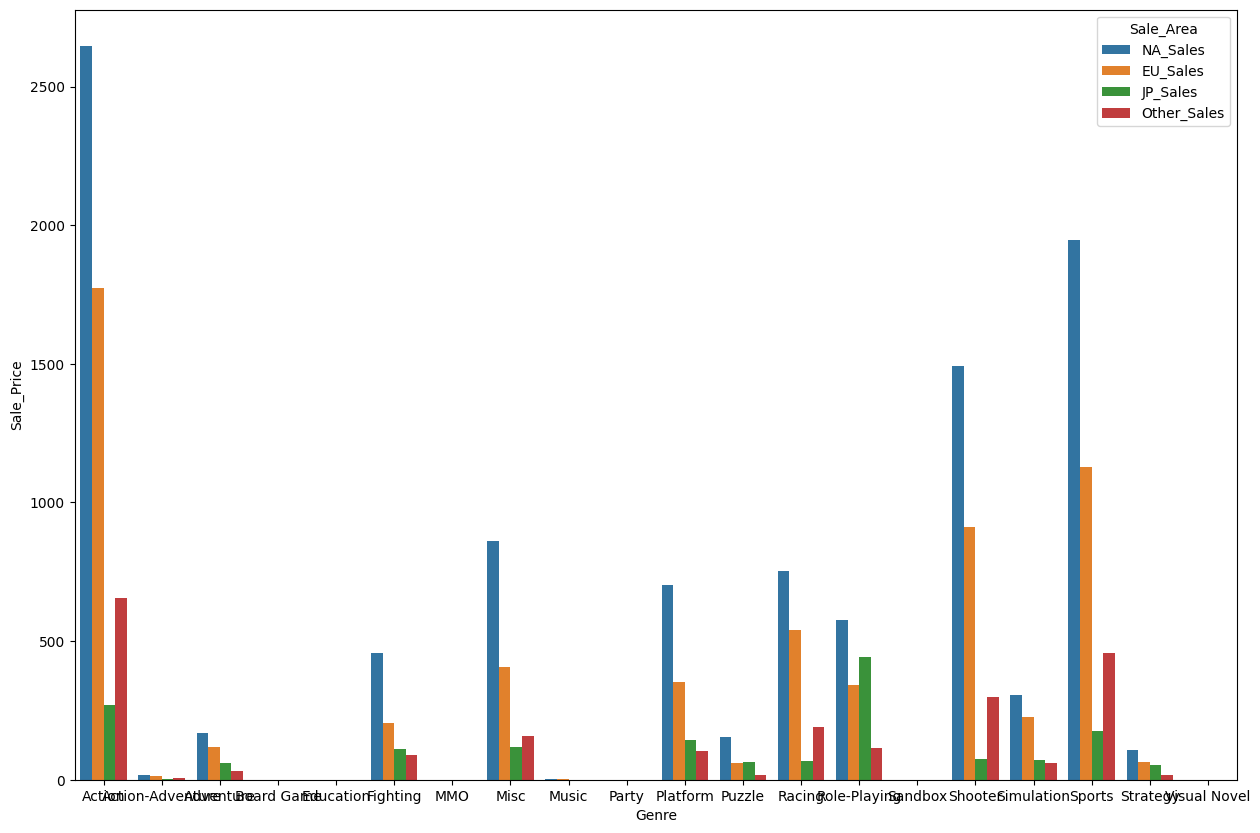

In [24]:
plt.figure(figsize=(15, 10))
sns.barplot(x='Genre', y='Sale_Price', hue='Sale_Area', data=comp_table)

- NA의 판매량이 가장 높으며 액션과 스포츠 장르가 가장 인기 있음

Text(0.5, 1.0, 'EU_Genre_Sales')

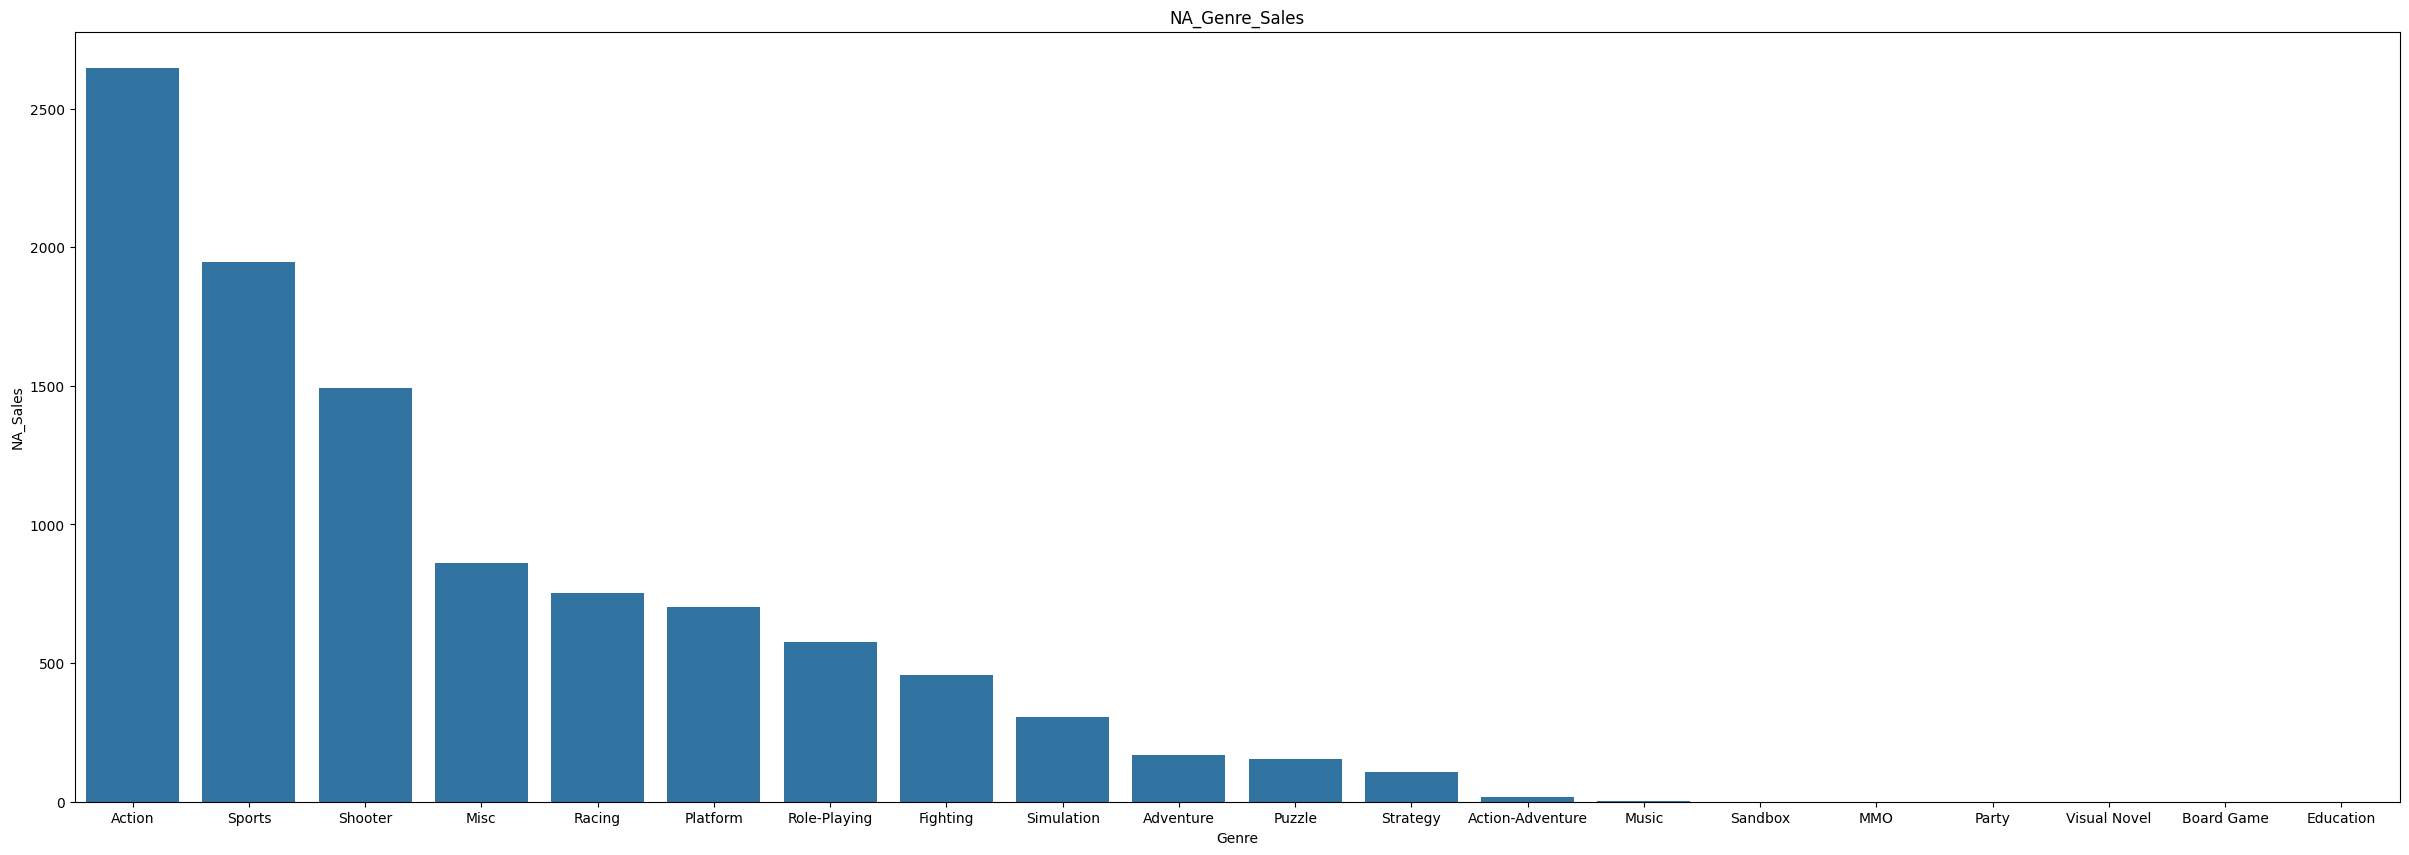

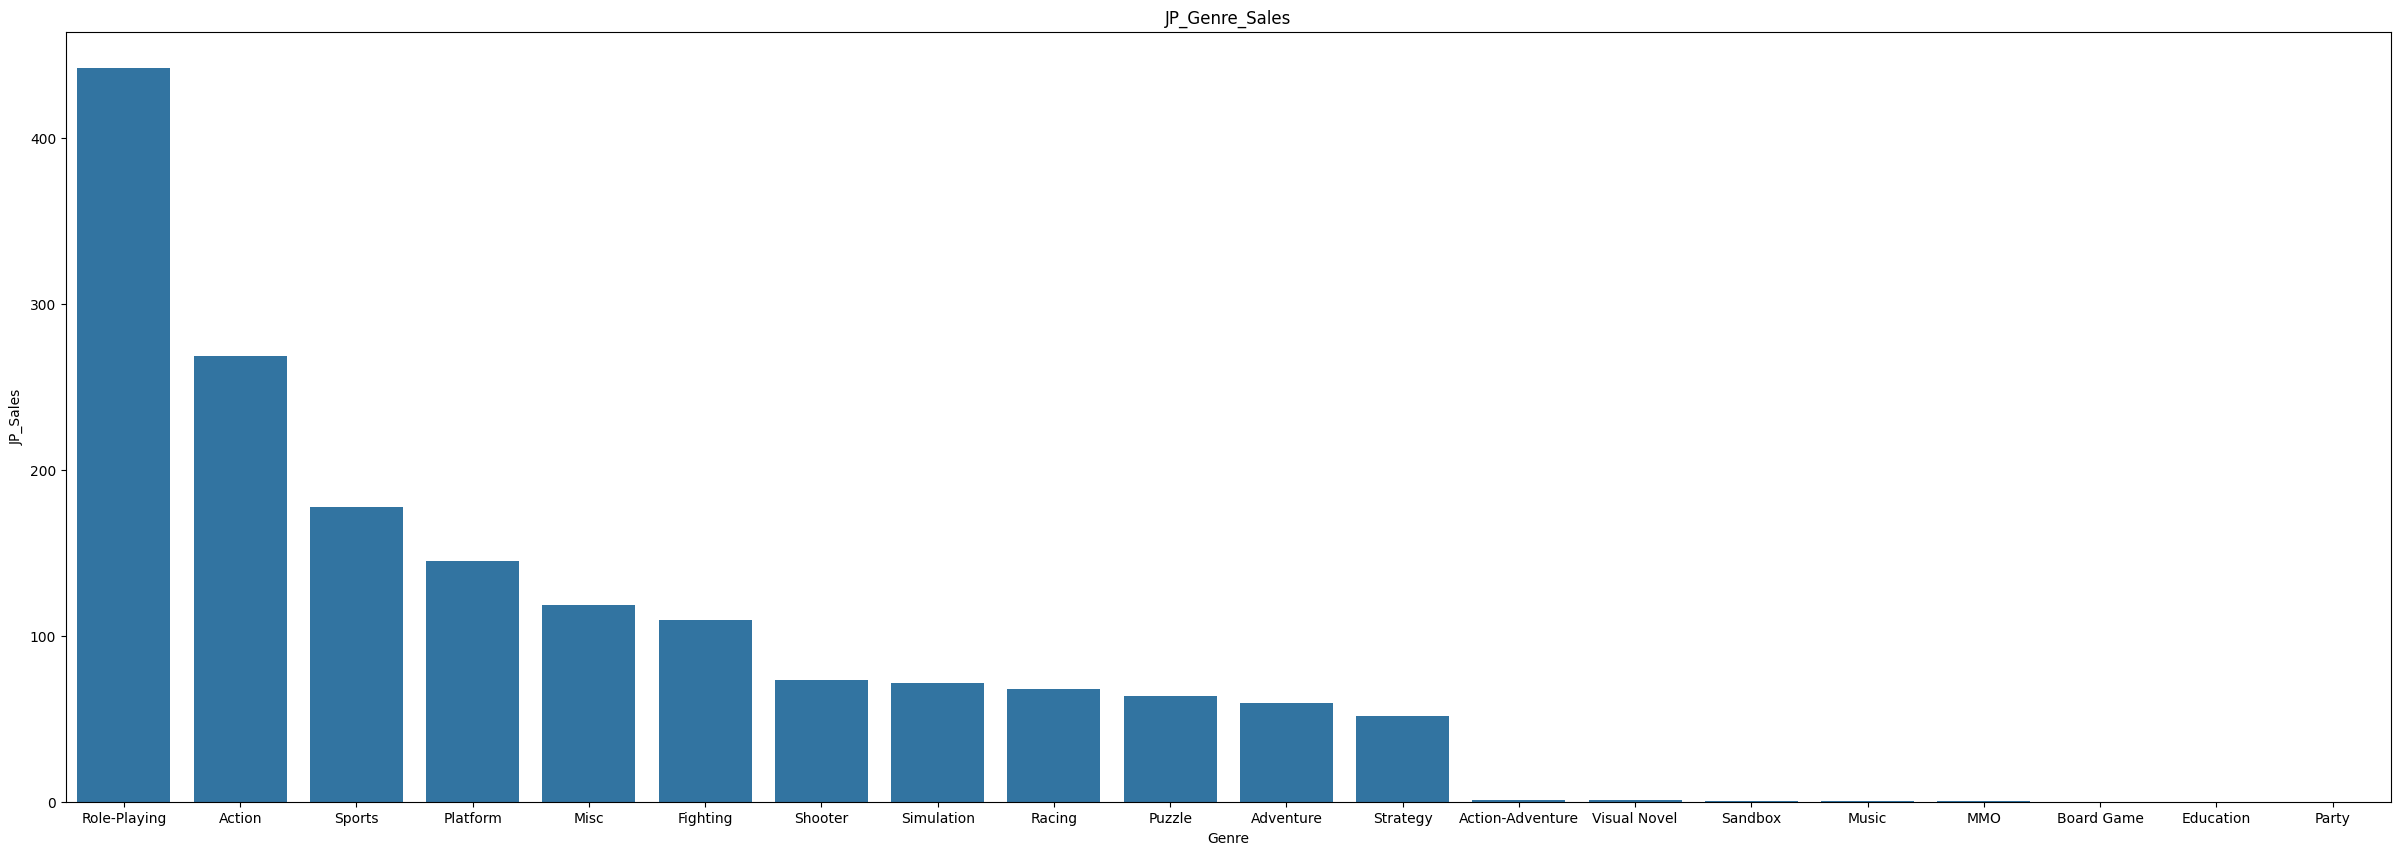

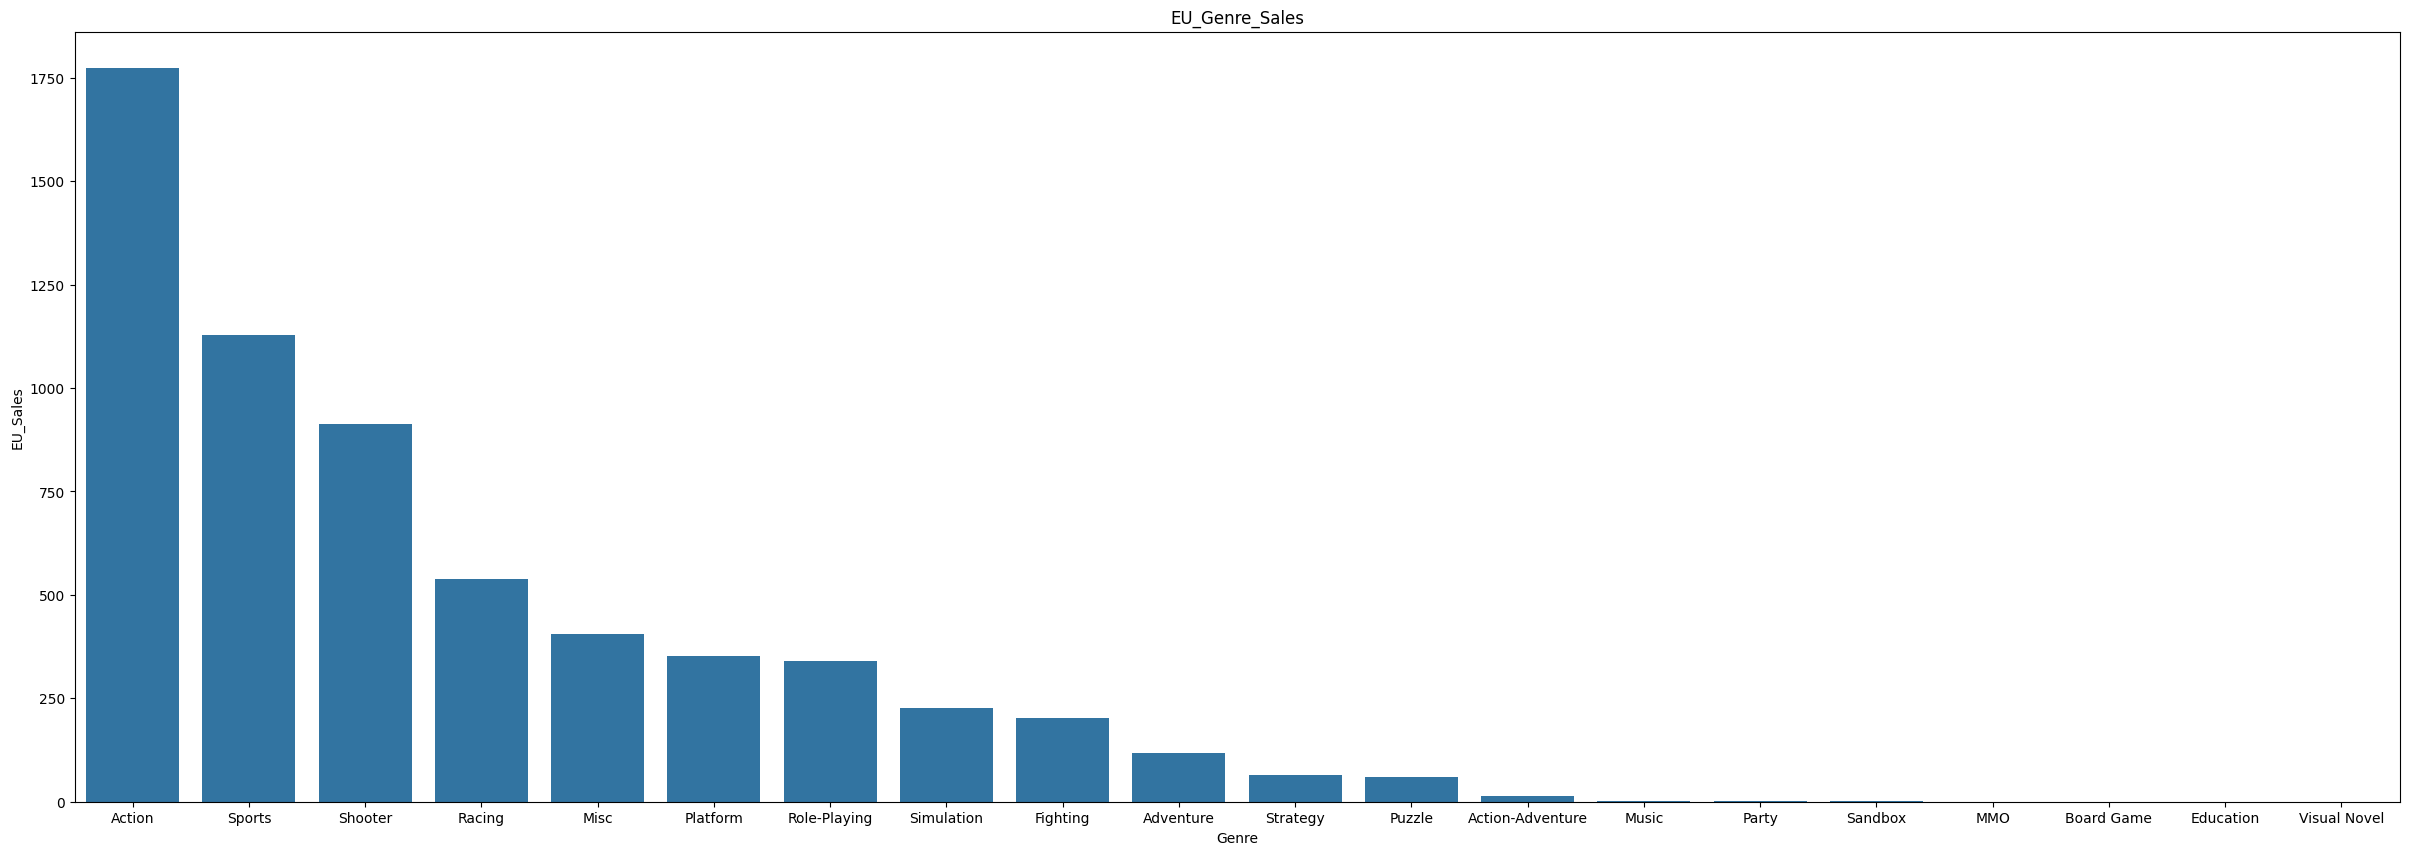

In [25]:
SNS_BAR_PLOT("Genre","NA_Sales","NA_Genre_Sales" ,comp_map.sort_values(by="NA_Sales",ascending=False))
SNS_BAR_PLOT("Genre","JP_Sales","JP_Genre_Sales" ,comp_map.sort_values(by="JP_Sales",ascending=False))
SNS_BAR_PLOT("Genre","EU_Sales","EU_Genre_Sales",comp_map.sort_values(by="EU_Sales",ascending=False))

- EU와 NA 는 액션과 스포츠가 가장 인기 있음.

- 예외적으로 일본은 Role_Playing 게임이 인기가 많은 것을 볼 수 있다.

---

## 세계 추세를 따라가지 않는 국가별 게임 취향

## Code

In [26]:
import numpy as np
USE=df[["Name","Year","Platform","Genre","Publisher","NA_Sales","JP_Sales","EU_Sales","Other_Sales","Global_Sales"]].dropna()
USE["linear"]= np.nan

USE_2010 = USE[USE["Year"]>2010]

USE_2000 = USE[USE["Year"]>2000]
USE_2000 = USE_2000[USE_2000["Year"]<2010]

USE_1990 = USE[USE["Year"]>1990]
USE_1990 = USE_1990[USE_1990["Year"]<2000]

In [27]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

def LinearRegression_use(features , target , DF):
   X_train, X_test, y_train, y_test = train_test_split(DF[[features]],DF[[target]],test_size = 0.2, random_state = 11)
   model =  LinearRegression()
   model.fit(X_train, y_train)

   print("MSE:",mean_squared_error(y_test, model.predict(X_test)))

   y_pred = model.predict(DF[[features]])
   DF["linear"].fillna(pd.Series(y_pred.flatten()), inplace=True)
   DF["compare"]=DF["linear"]<DF[target]
   return DF


def graph(X,Y,TITLE, DF):
   USE = LinearRegression_use(X, Y, DF).dropna()
   df_True = DF[DF[USE_LIST]["compare"]==True]
   df_False = DF[DF[USE_LIST]["compare"]==False]
   df_True.drop(df_True[df_True[Y]<0.01].index , inplace = True)
   df_True[df_True["linear"]<0] =0
   plt.figure(figsize=(20,10))
   return sns.barplot(x=df_True["Genre"], y=df_True[Y], data=df_True).set_title(TITLE)

USE_LIST = ["Name","Platform","Genre","Publisher","Global_Sales","JP_Sales","compare","linear"]

## 그래프

In [28]:

USE_2010 = USE[USE["Year"]>2010]

USE_2000 = USE[USE["Year"]>2000]
USE_2000 = USE_2000[USE_2000["Year"]<2010]

USE_1990 = USE[USE["Year"]>1990]
USE_1990 = USE_1990[USE_1990["Year"]<2000]

MSE: 0.038790195134782206


<ipython-input-27-2099bbcb6831>:13: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  DF["linear"].fillna(pd.Series(y_pred.flatten()), inplace=True)
<ipython-input-27-2099bbcb6831>:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF["linear"].fillna(pd.Series(y_pred.flatten()), inplace=True)
<ipython-input-27-2099bbcb6831>:14: SettingWithCopyWarn

MSE: 0.028658645439915142


<ipython-input-27-2099bbcb6831>:13: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  DF["linear"].fillna(pd.Series(y_pred.flatten()), inplace=True)
<ipython-input-27-2099bbcb6831>:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_True.drop(df_True[df_True[Y]<0.01].index , inplace = True)
<ipython-input-27-2099bbcb6831>:23: SettingWithCopyWarni

MSE: 0.11689497037195488


<ipython-input-27-2099bbcb6831>:13: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  DF["linear"].fillna(pd.Series(y_pred.flatten()), inplace=True)
<ipython-input-27-2099bbcb6831>:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_True.drop(df_True[df_True[Y]<0.01].index , inplace = True)
<ipython-input-27-2099bbcb6831>:23: SettingWithCopyWarni

Text(0.5, 1.0, 'Global - JP')

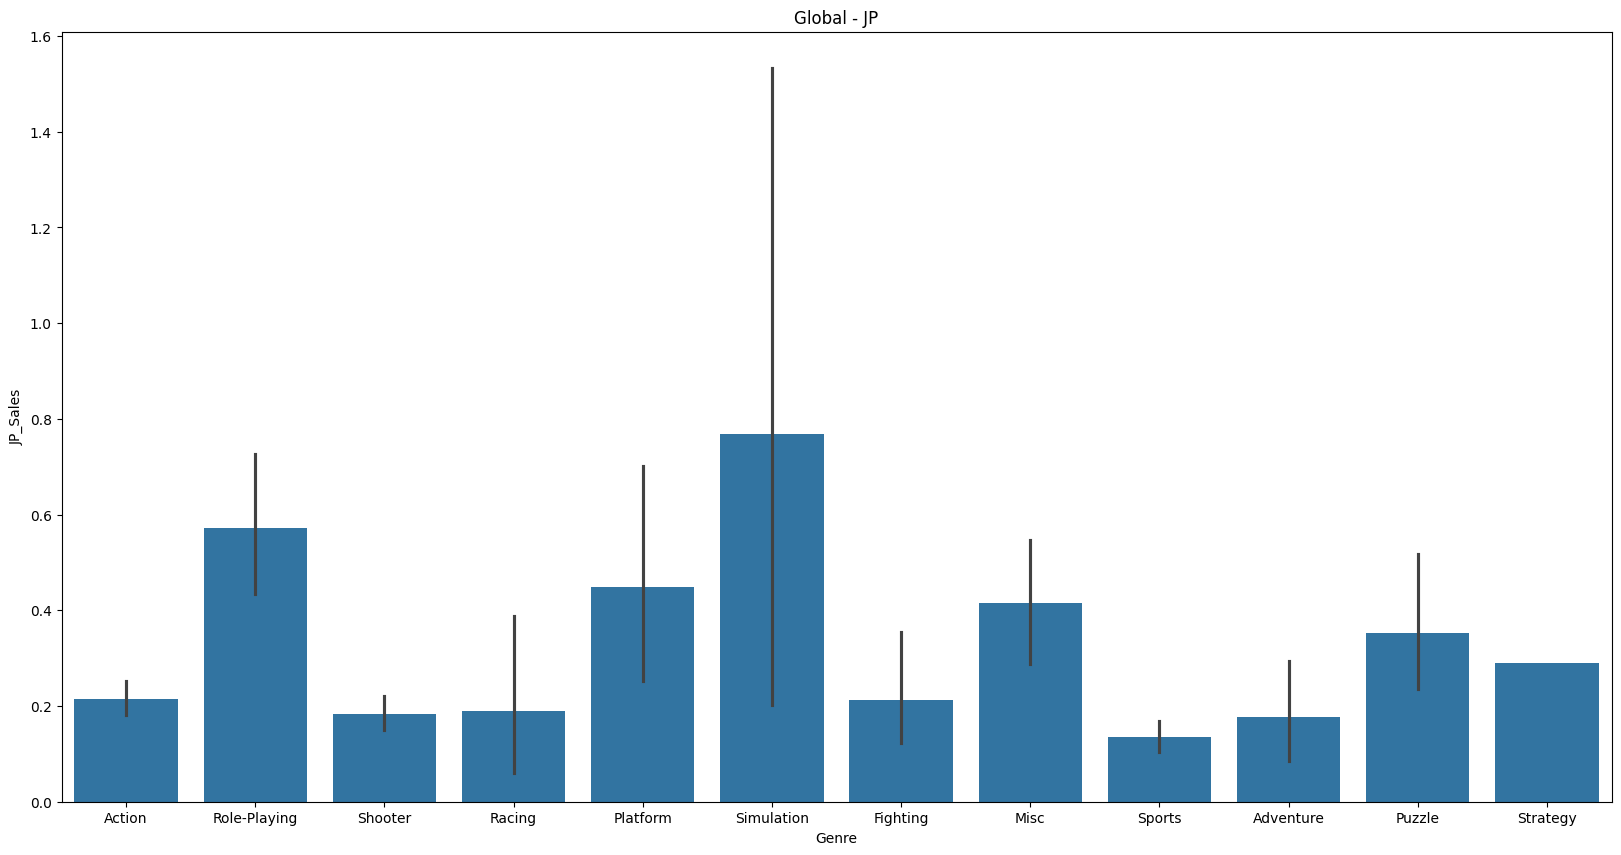

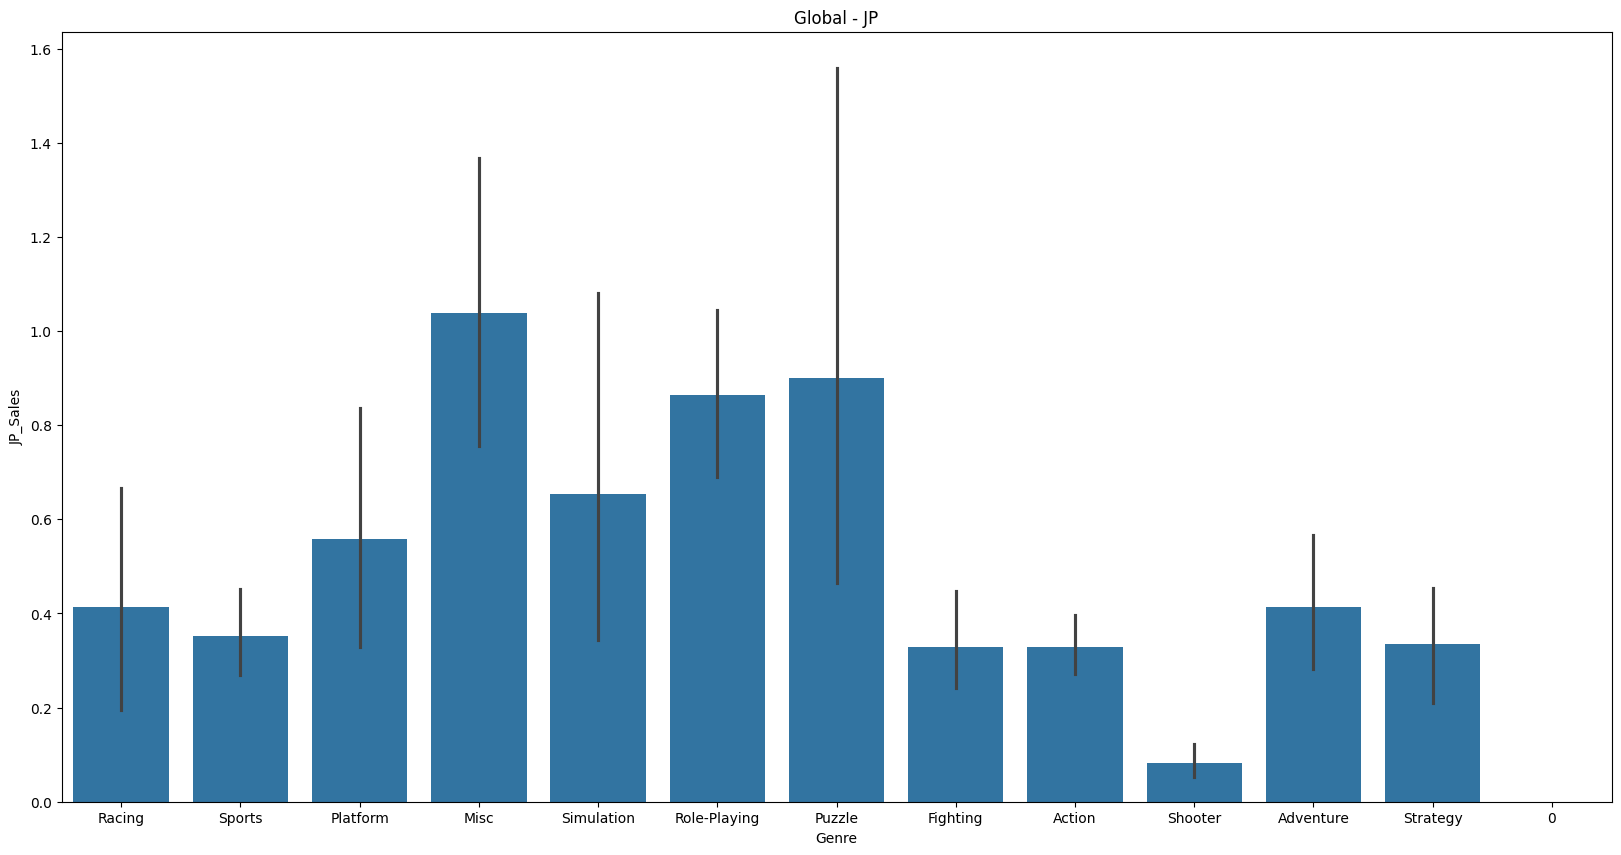

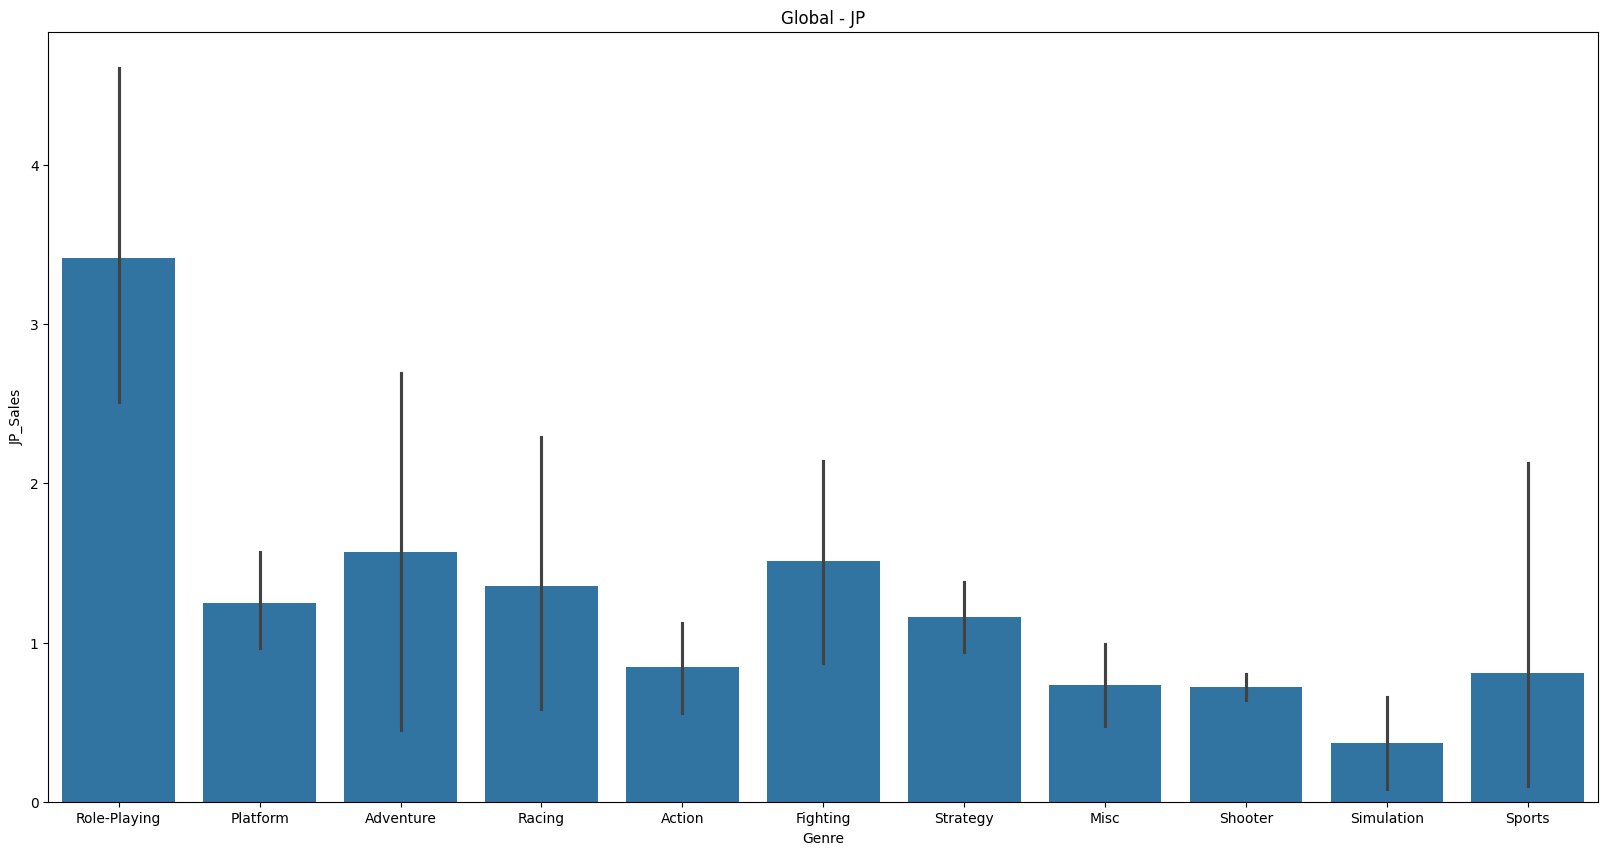

In [29]:
graph("Global_Sales","JP_Sales","Global - JP" , USE_2010)
graph("Global_Sales","JP_Sales","Global - JP" , USE_2000)
graph("Global_Sales","JP_Sales","Global - JP" , USE_1990)




MSE: 0.078797026498547


<ipython-input-27-2099bbcb6831>:13: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  DF["linear"].fillna(pd.Series(y_pred.flatten()), inplace=True)
<ipython-input-27-2099bbcb6831>:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF["linear"].fillna(pd.Series(y_pred.flatten()), inplace=True)
<ipython-input-27-2099bbcb6831>:14: SettingWithCopyWarn

MSE: 0.04298659758348603


<ipython-input-27-2099bbcb6831>:13: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  DF["linear"].fillna(pd.Series(y_pred.flatten()), inplace=True)
<ipython-input-27-2099bbcb6831>:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_True.drop(df_True[df_True[Y]<0.01].index , inplace = True)
<ipython-input-27-2099bbcb6831>:23: SettingWithCopyWarni

MSE: 0.09207811481203002


<ipython-input-27-2099bbcb6831>:13: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  DF["linear"].fillna(pd.Series(y_pred.flatten()), inplace=True)
<ipython-input-27-2099bbcb6831>:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_True.drop(df_True[df_True[Y]<0.01].index , inplace = True)
<ipython-input-27-2099bbcb6831>:23: SettingWithCopyWarni

Text(0.5, 1.0, 'Global - NA')

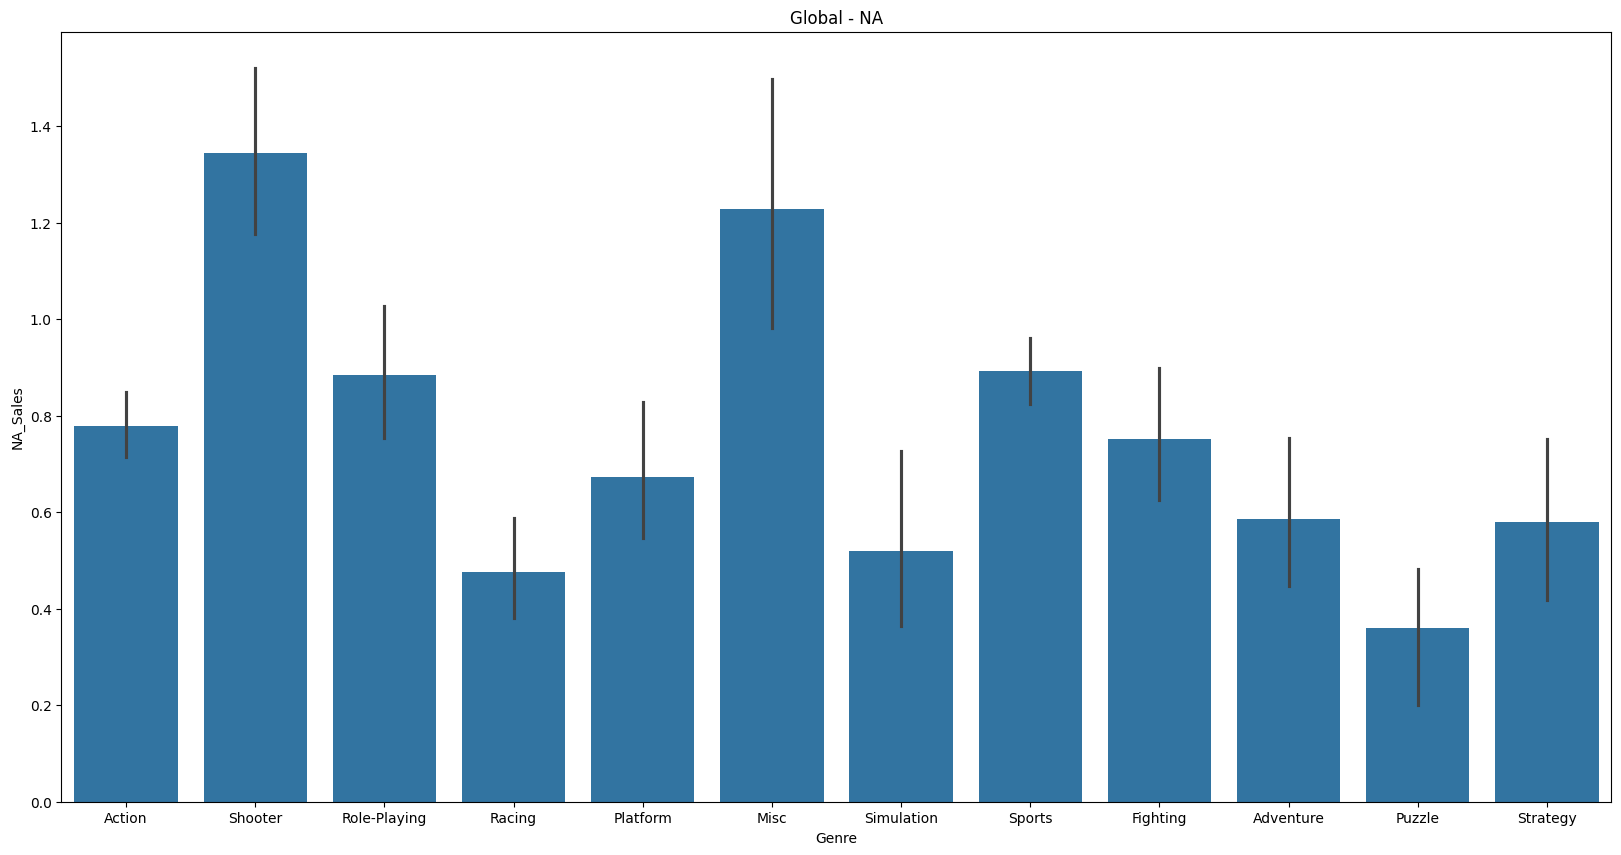

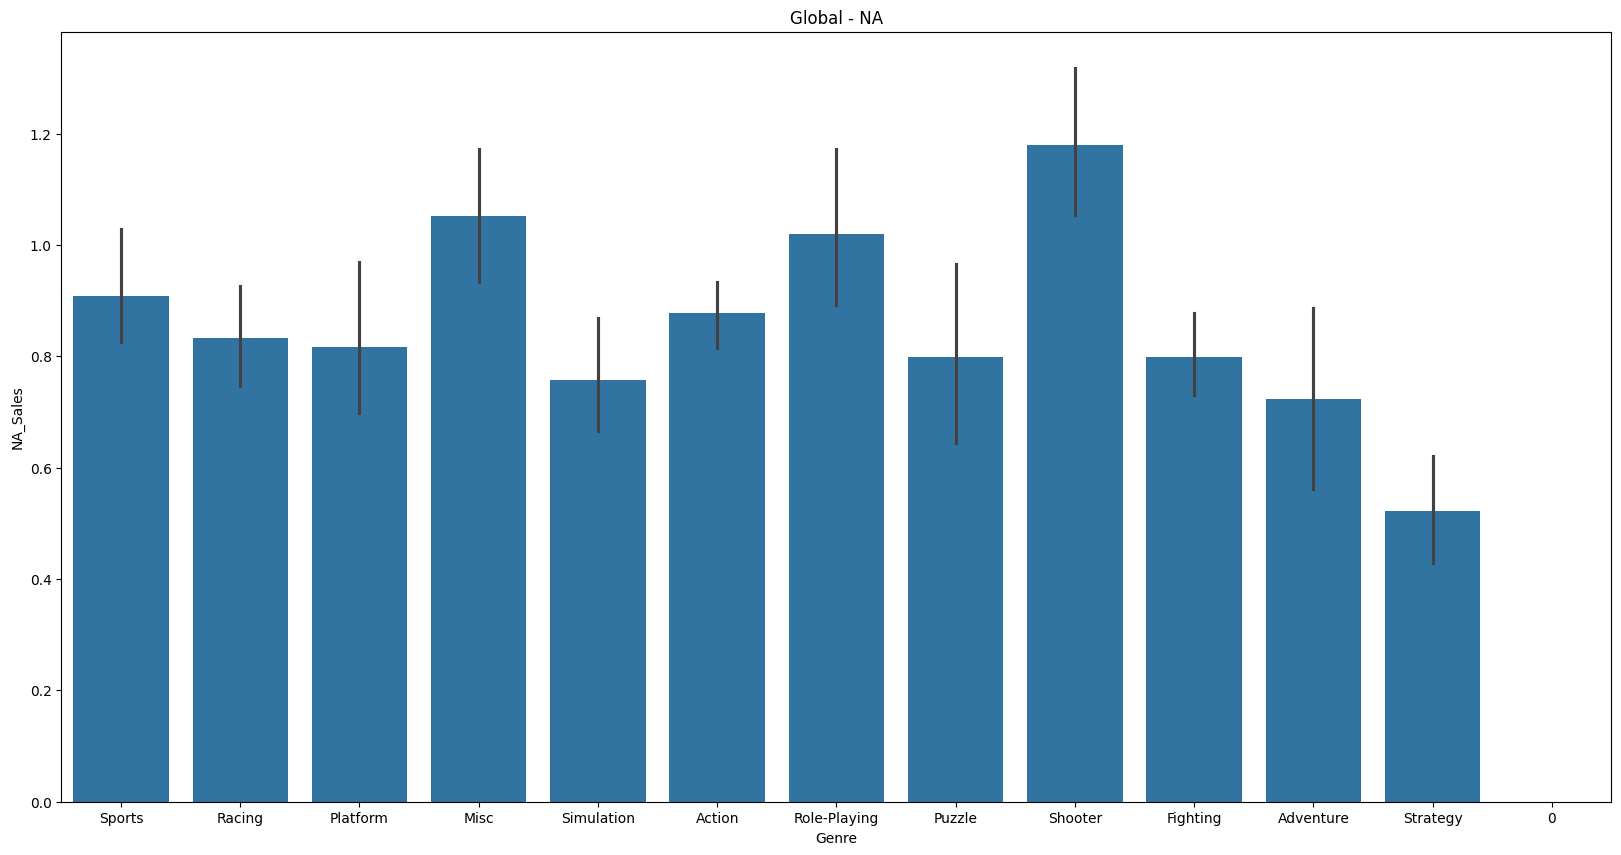

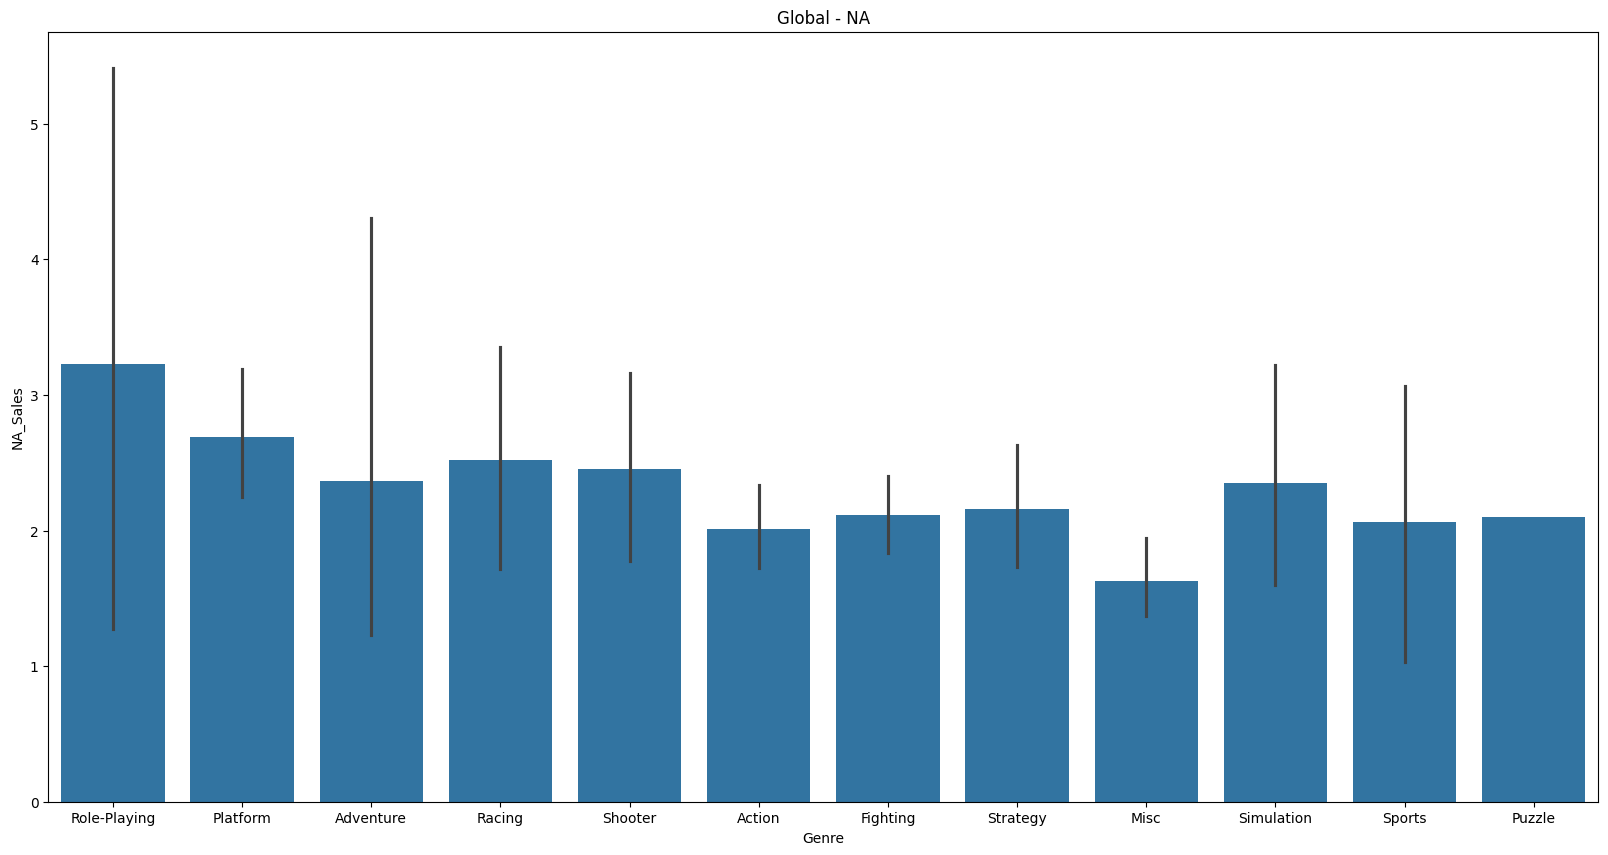

In [30]:
graph("Global_Sales","NA_Sales", "Global - NA", USE_2010)
graph("Global_Sales","NA_Sales", "Global - NA", USE_2000)
graph("Global_Sales","NA_Sales", "Global - NA", USE_1990)

MSE: 0.047603101663830166


<ipython-input-27-2099bbcb6831>:13: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  DF["linear"].fillna(pd.Series(y_pred.flatten()), inplace=True)
<ipython-input-27-2099bbcb6831>:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF["linear"].fillna(pd.Series(y_pred.flatten()), inplace=True)
<ipython-input-27-2099bbcb6831>:14: SettingWithCopyWarn

MSE: 0.04468220789297724


<ipython-input-27-2099bbcb6831>:13: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  DF["linear"].fillna(pd.Series(y_pred.flatten()), inplace=True)
<ipython-input-27-2099bbcb6831>:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_True.drop(df_True[df_True[Y]<0.01].index , inplace = True)
<ipython-input-27-2099bbcb6831>:23: SettingWithCopyWarni

MSE: 0.058276530270192785


<ipython-input-27-2099bbcb6831>:13: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  DF["linear"].fillna(pd.Series(y_pred.flatten()), inplace=True)
<ipython-input-27-2099bbcb6831>:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_True.drop(df_True[df_True[Y]<0.01].index , inplace = True)
<ipython-input-27-2099bbcb6831>:23: SettingWithCopyWarni

Text(0.5, 1.0, 'Global - EU')

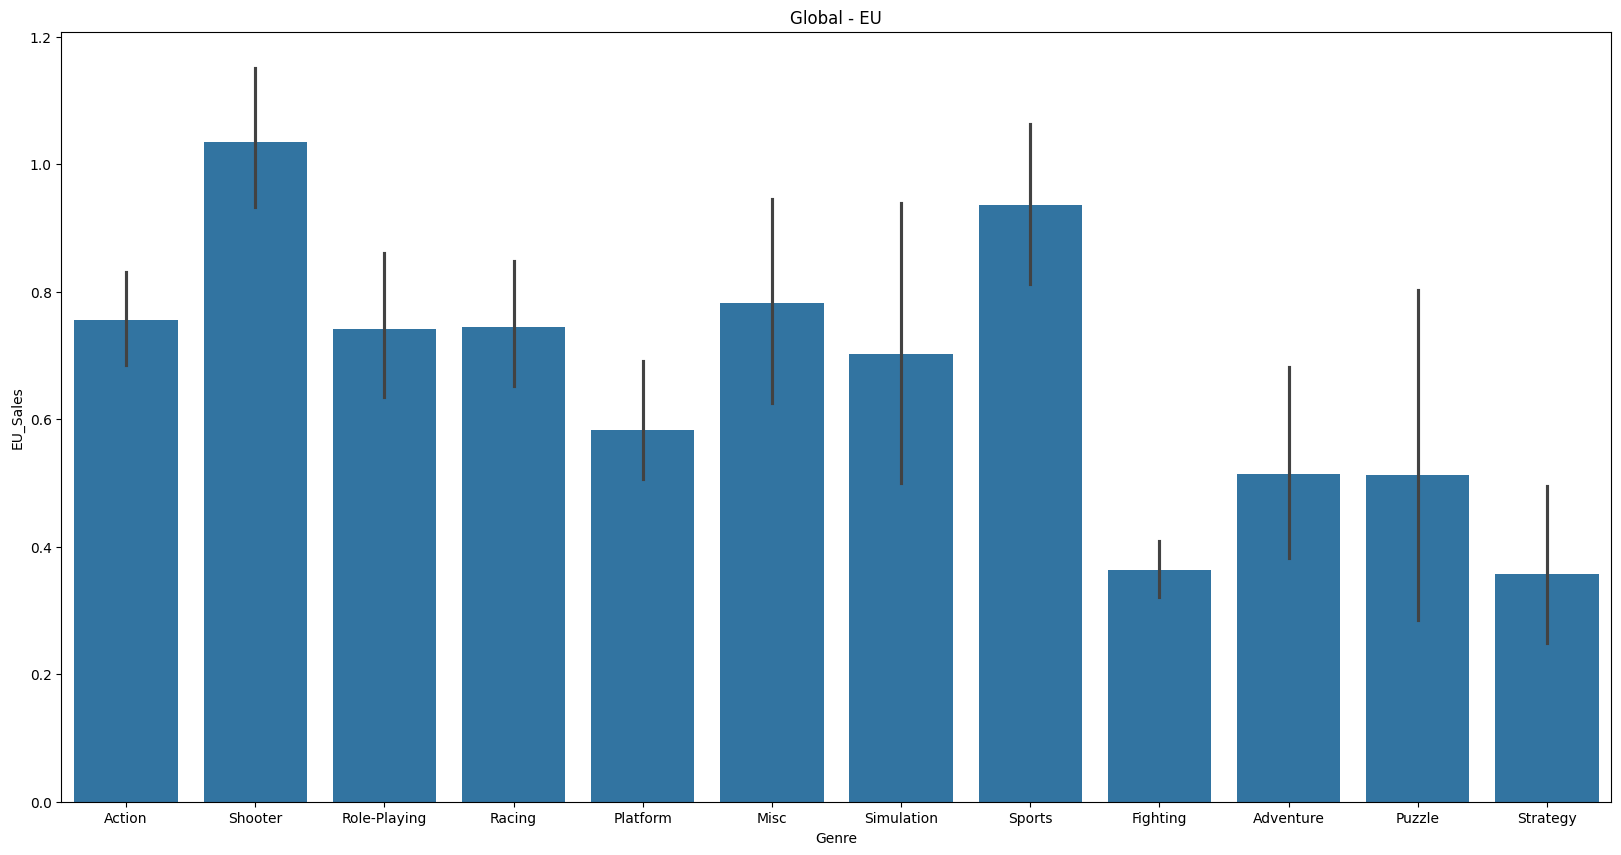

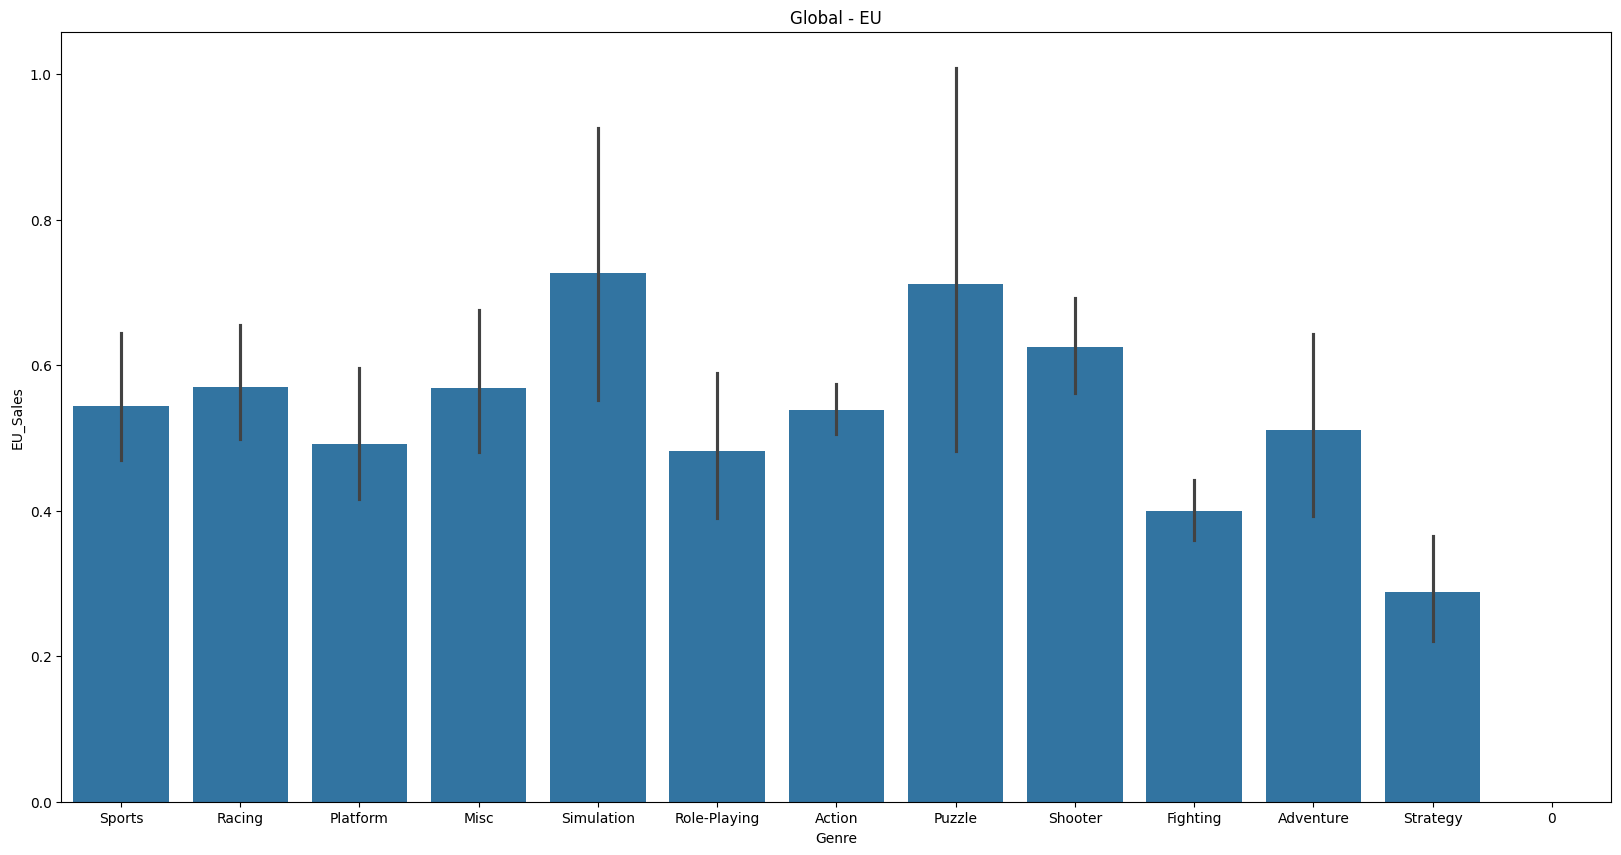

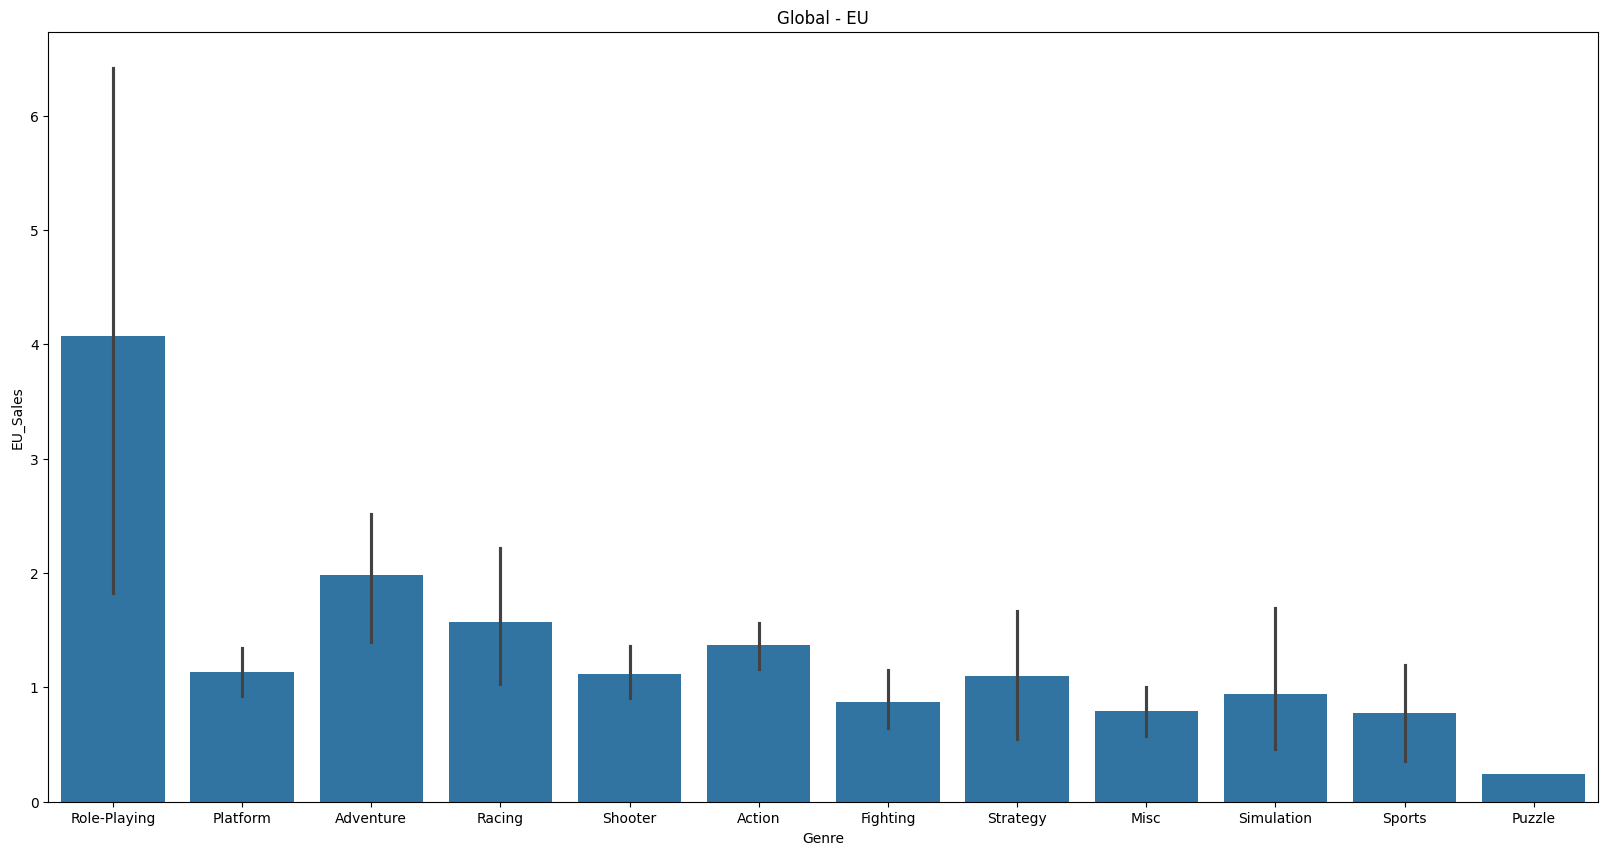

In [31]:

graph("Global_Sales","EU_Sales", "Global - EU", USE_2010)
graph("Global_Sales","EU_Sales", "Global - EU", USE_2000)
graph("Global_Sales","EU_Sales", "Global - EU", USE_1990)

각 국가별로 Global_Sales를 이용한 선형회귀를 사용하였다.
 예측값 보다 높게 판매가 된 게임은 인기가 좋았거나 , 특별히 히트를 쳤다고 볼 수 있겠다.

그러므로 대박을 노리고 있다면 예측값보다 더 판매가 많이된 게임들의 장르를 노린다면 그 국가에서 대박칠 가능성이 높아질것이다.



- NA : Shooter 장르가 가장 특출나게 인기가 많았고, Sports, Platform, Role-Playing이 비슷하게 나왔다 . Adventure와 Strategy를 제외하고는 히트칠 가능성이 있고 Shooter 장르를 노리면 크게 한탕칠 가능성이 있음

- 일본 : Platform 장르가 세계 판매량과 비교하여 많이 팔렸다. (ex: 슈퍼마리오) , 다른 국가들과는 다르게 shooter action, sports 장르가 그닥 히트치지는 못했는데 히트를 노린다면 조금 다른 전략을 이용할 필요가 있어보임

- EU  : shooter 장르가 특히 더 많이 팔림 , 그 다음으로 스포츠 게임이 많이 팔렸고 롤플레잉과 시뮬레이션이 있기 있었다. Platform은 히트칠 가능성이 조금 밀리는 경향이 있는듯


---

#랜덤 포레스트


## Code

In [32]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score


chart = USE[["Year","NA_Sales","JP_Sales","EU_Sales","Other_Sales","Global_Sales"]].groupby("Year").sum().reset_index()
critic_df= df[["Critic_Score","Critic_Count","User_Score","User_Count","NA_Sales","EU_Sales","JP_Sales","Other_Sales","Rating"]].dropna()

ALL = critic_df[["Critic_Score","Critic_Count","User_Score","User_Count","NA_Sales","EU_Sales","JP_Sales","Other_Sales"]]
CRITIC =critic_df[["Critic_Score","Critic_Count","User_Score","User_Count"]]
SALES =critic_df[["NA_Sales","EU_Sales","JP_Sales","Other_Sales"]]

def critic(n, LIST, TITLE):
   %matplotlib inline
   Rating = pd.get_dummies(critic_df["Rating"])

   X_Critic = LIST
   y_Global = Rating

   X_train ,X_test , y_train, y_test = train_test_split(X_Critic, y_Global, train_size= 0.7 , test_size =0.3)

   clf = RandomForestClassifier(n_estimators=n)
   clf.fit(X_train, y_train)
   y_pred = clf.predict(X_test)
   print("정확도",accuracy_score(y_test,y_pred)*100,"점")
   ftr_importances_values = clf.feature_importances_
   ftr_importances = pd.Series(ftr_importances_values, index = X_train.columns)
   tr_top20 = ftr_importances.sort_values(ascending=False)

   return make_chart(TITLE, tr_top20,  tr_top20.index)

def make_chart(TITLE, X, Y ):
   plt.figure(figsize=(8,6))
   plt.title(TITLE)
   sns.barplot(x=X, y=Y)
   return plt.show()



In [33]:
rfs_Platform = df[["Platform","Year","Global_Sales","JP_Sales","EU_Sales","NA_Sales","Rating"]].dropna()
rfs_Platform= rfs_Platform[rfs_Platform["Year"]>=2010]

In [34]:
rfs_Platform

,Platform,Year,Global_Sales,JP_Sales,EU_Sales,NA_Sales,Rating
20,X360,2010.0,21.82,0.24,4.94,14.97,E
21,PS3,2013.0,21.40,0.97,9.27,7.01,M
22,PS3,2013.0,21.40,0.97,9.27,7.01,M
23,PS3,2013.0,21.40,0.97,9.27,7.01,M
24,PS3,2013.0,21.40,0.97,9.27,7.01,M
...,...,...,...,...,...,...,...
34459,XOne,2016.0,0.01,0.00,0.01,0.00,E
34462,XOne,2016.0,0.01,0.00,0.01,0.00,E
34461,XOne,2016.0,0.01,0.00,0.01,0.00,E
34456,3DS,2011.0,0.01,0.00,0.00,0.01,T


## 그래프

정확도 51.56631026073908 점


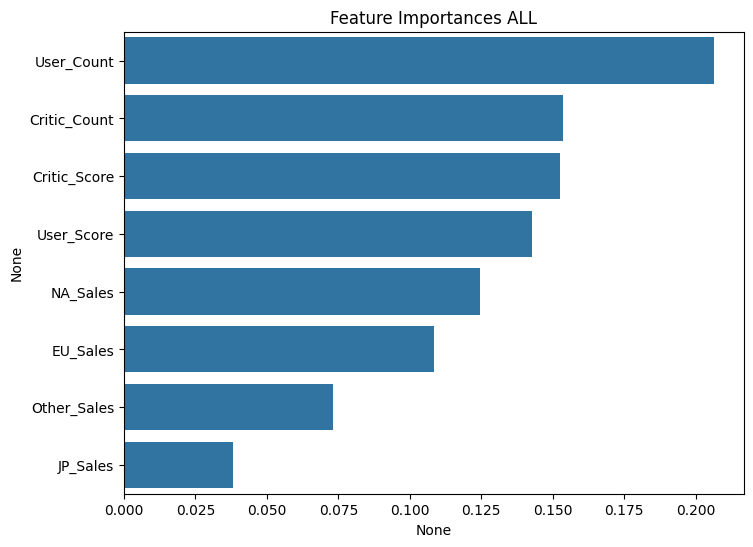

정확도 83.38022885012192 점


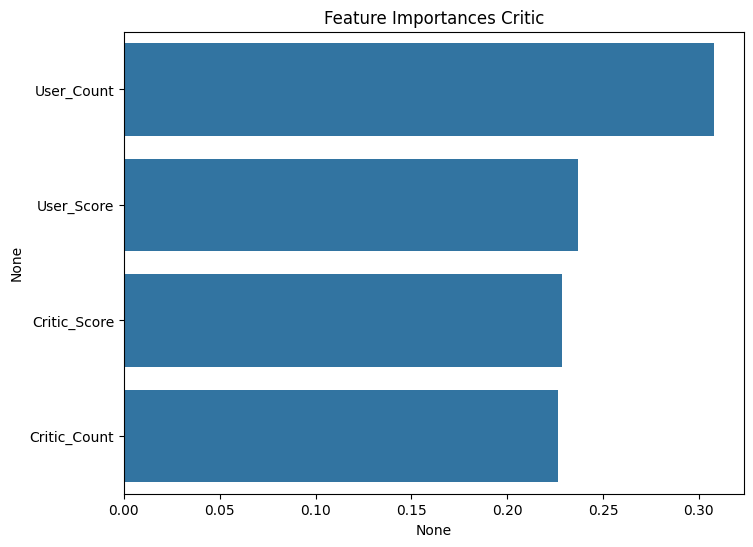

정확도 51.828925154755204 점


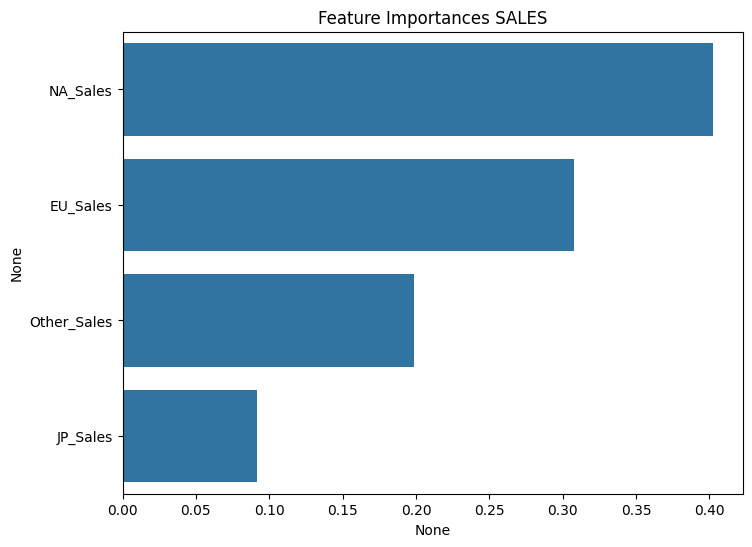

In [35]:
critic(100, ALL,"Feature Importances ALL")
critic(100, CRITIC ,"Feature Importances Critic")
critic(100, SALES ,"Feature Importances SALES")


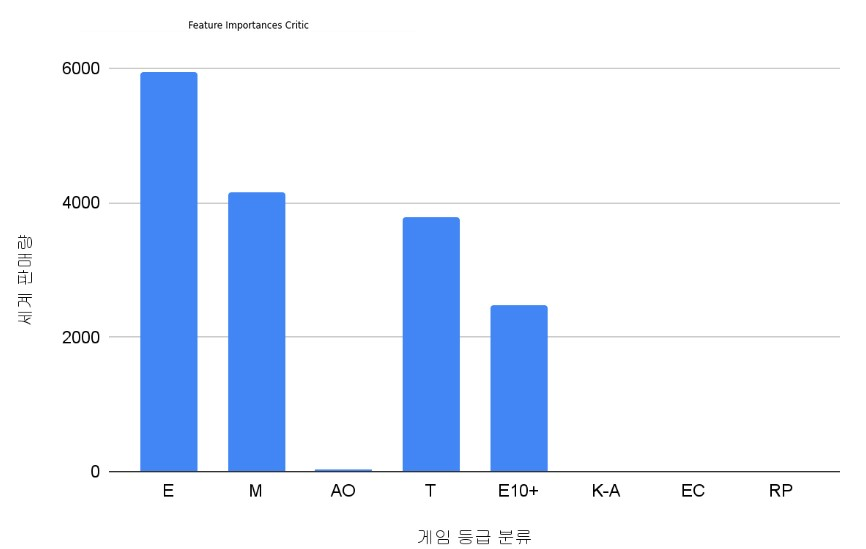

- 기능 소개

   랜덤포레스트를 사용하여 특성 중요도를 작성 .

- 작업 내용

   User Count&Score , Critic Count& Score 로 게임 등급을 예측하였을때 정확도 80
   
   User Count가 가장 크게 영향을 미침


   > 유저 투표수와 점수, 크리틱 투표수 와 점수가 게임 등급에 강하게 영향을 받는다


- 예상 1 (Critic & User):

 등급 분류가 높아지면 판매 가능 연령이 줄어듬 -> 유저 투표수가 줄어듬 -> 판매량 감소
 > 등급이 낮을수록 좋음

- 예상 2 ( Sales ):

 등급 분류에 판매량이 영향을 받기는 하지만 강력하게 영향을 받지는 않음
 >반드시 E 등급을 목표로할 필요는 없음

- 결론 :

 게임 등급 분류에 집착할 필요는 없지만 낮으면 낮을수록 좋다 , 특히 성인등급만 피하면 된다.


## Code

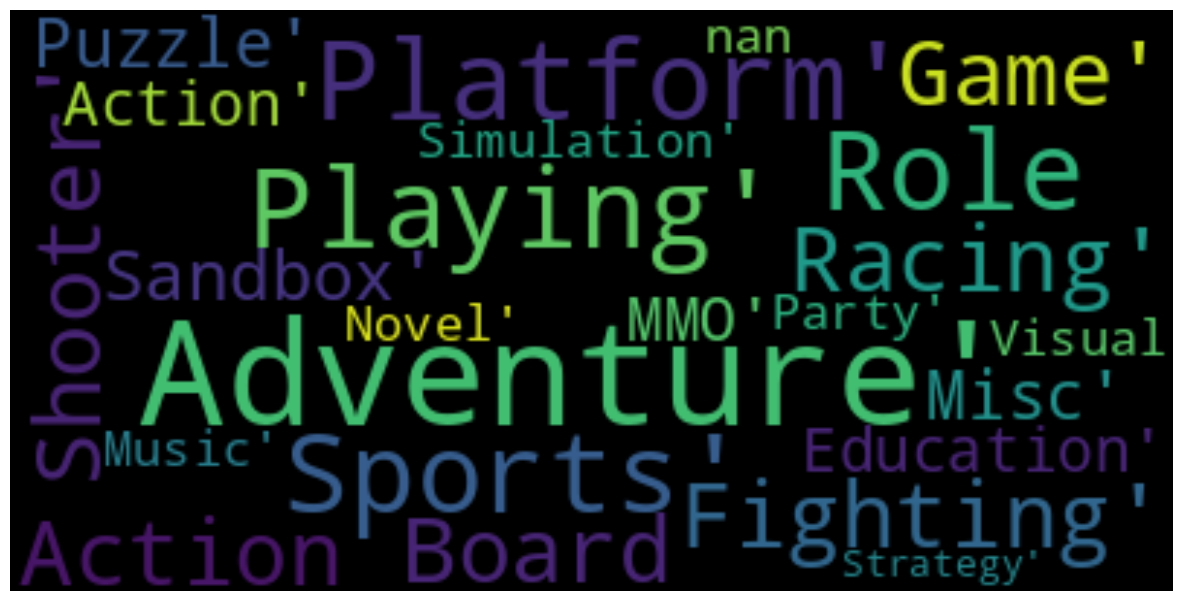

In [36]:

from wordcloud import WordCloud, ImageColorGenerator

text = list(set(df['Genre']))
plt.rcParams['figure.figsize'] = (15,15)
wordcloud = WordCloud(max_font_size=50, max_words=100,background_color="black").generate(str(text))

plt.imshow(wordcloud,interpolation="bilinear")
plt.axis("off")
plt.show()

# 게임 연대기
https://youtu.be/4U9hOvB27u8